# Final Project Submission

* Student name: Shayan Abdul Karim Khan
* Student pace: Self Paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni

## Problem Overview

Each year more than 42,000 people are needlessly killed on American streets and thousands more are injured. We call this suffering traffic “accidents” — but, in reality, we have the power to prevent traffic collisions. To counter these fatalities and injuries, the Department of Transportations (DOTs) across the US are working towards a new vision for safety called "Vision Zero". 

Vision Zero recognizes that people will sometimes make mistakes, so the road system and related policies should be designed to ensure those inevitable mistakes do not result in severe injuries or fatalities. This means that system designers and policymakers are expected to improve the roadway environment, policies (such as speed management), and other related systems to lessen the severity of crashes by working with stakeholders ranging from auto manufacturers to policy makers.

Similarly, the Chicago DOT wants to conduct a study to understand the underlying patterns for car accidents. The ask is to use the data available to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc. 

## Business Questions

In its work towards Vision Zero, the Chicago DOT has the following questions:

1. What are the common variables between the different classes of traffic accidents?
<br>

2. Is there a discernable pattern to the accidents?


### Resolution Approach

To help inform appropriate measures towards the movement to Vision Zero, aa classifier for predictions. The data will be assessed for recommendations on 4 different fronts:
<br>

1. Type of Vehicle: For example; Passenger Vehilce, Commercial Vehicle, etc.
<br>

2. Nature Effects: For example; Rainy, Snow, Windy, etc.
<br>

3. Infrasturcture Effects: For example, specific locaations, faulty equipment or bad road conditions.
<br>

4. Type of accidents: This is important to understand the cause behind it. For eexample; a DUI accident would have drastically different preventative measures as compared to a sober over-speeding accident
<br>

For prioritization purposes, it will also bee critical to understand what accidents resullted in fatalities or injuries and which didn't.

## Data Sources

The data being used is from the Chicago Polic Department (CPD) and is provided oninee by the City of Chicago. The data is from 2015 to the present day. It is updated daily but the data being used as a part of this project is recent until 3rd February 2023. 

There are 3 datasets being used for analysis:

1. Traffic crashes data summary: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3ifv 
<br>

2. Vehicles information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3 
<br>

3. People information involved in a crash: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d 

Considering that this is the official dataset of the City of Chicago regarding traffic crashes, it can be easilly concluded that it would be the most reliable dataset available. Using this dataset will also increase the confidence of the client on the results and recommendations of this project. 

## Data Understanding

This section will be exploratory to understand the different features of the data. All three datasets will be explored separately. Using the source documentation, data and the features will be interpreted and determinations will made about which features are relevant to target. Towards the end of exploring the data, avenues of analysis that can be used will also become clearer. As data is explored, any anomalies or issues require further cleaniing/processing will be identified and handled in the `Data Preparation` section.

To start things off, lets import all the libraries and functions that will be used in this notebook.

In [1316]:
import pandas as pd #imports the pandas library as pd to work on databases
from sodapy import Socrata # for API integration
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
from datetime import datetime # for datetime manipulation
import matplotlib.pyplot as plt # importing matplotlib for visualizations 
%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn
from collections import Counter #import Counter
import statsmodels.api as sm #import stats models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import scikit library functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.feature_selection import RFECV


#import scipy libraries
from scipy import stats as stats

#import plotly
import plotly.express as px
import plotly.graph_objects as go

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

### Traffic Crashes - Crashes

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Crashes`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if.

Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are added to the data portal when a crash report is finalized or when amendments are made to an existing report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data are not available until September 2017. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by the reporting officer based on best available information at the time, but many of these may disagree with posted information or other assessments on road conditions. If any new or updated information on a crash is received, the reporting officer may amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding police agency, typically crashes on interstate highways, freeway ramps, and on local roads along the City boundary, are excluded from this dataset.

As per Illinois statute, only crashes with a property damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes. However, CPD records every reported traffic crash event, regardless of the statute of limitations, and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not include all the crashes listed here.

In [1317]:
#import the dataset using the API endpoint
crashes_df = pd.read_csv('data/Traffic_Crashes-Crashes.csv')

#preview thee first 5 rows
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,05b1982cdba5d8a00e7e76ad1ecdab0e598429f78481d2...,JF378711,NaN,08/29/2022 11:30:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,11,2,8,41.749348,-87.721097,POINT (-87.721096727406 41.749348170421)
4,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)


In [1318]:
#Explore the info for all the features
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                692784 non-null  object 
 1   RD_NO                          688672 non-null  object 
 2   CRASH_DATE_EST_I               52531 non-null   object 
 3   CRASH_DATE                     692784 non-null  object 
 4   POSTED_SPEED_LIMIT             692784 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         692784 non-null  object 
 6   DEVICE_CONDITION               692784 non-null  object 
 7   WEATHER_CONDITION              692784 non-null  object 
 8   LIGHTING_CONDITION             692784 non-null  object 
 9   FIRST_CRASH_TYPE               692784 non-null  object 
 10  TRAFFICWAY_TYPE                692784 non-null  object 
 11  LANE_CNT                       198997 non-null  float64
 12  ALIGNMENT                     

There are a number of columns with missing values but they can also simply be categorical columns that don't apply to all records. The documentation on the columns available on https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if can be used to explore the columns separately. The descriptions have also been listed below.

1. `CRASH_RECORD_ID`: This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. This will be important for joining the databases.
<br>

2. `RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes.
This column can be ignored since this does not give us any insight into the causes of crashes. **DROP COLUMN**
<br>

3. `CRASH_DATE_EST_I`: Crash date estimated by desk officer or reporting party (only used in cases where crash is reported at police station days after the crash). This column can be ignored since there are missing values here. There is another column for Crash Dates but has no missing values. **DROP COLUMN**
<br>

4. `CRASH_DATE`: Date and time of crash as entered by the reporting officer. This gives us insight into if there are periods where there are more crashes than others. If there is a discernable pattern, appropriate preventative measures can be taken. The time and date will have to be separated out for individual analysis. Also the initial description of thee dataset mentions that 2018 onwards citywide E-craash daat aiss available. Therefore, the data will be filtered out accordingly. Also, the daata has to be changed to datetime versions for proper use.
<br>

5. `POSTED_SPEED_LIMIT`: Posted speed limit, as determined by reporting officer. This is the speed limit for the area where the crash happened. This coupled with the speed that the car was travelling at can help inform if the crash was at high speeds. Consequently, this can be a critical contirbutor in determining the cause of the crash.
<br>

6. `TRAFFIC_CONTROL_DEVICE`: Traffic control device present at crash location, as determined by reporting officer. It would be important to understand the contents of this column before making a decision on its use. 

In [1319]:
#check unique values
crashes_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS                 397249
TRAFFIC SIGNAL              192000
STOP SIGN/FLASHER            68792
UNKNOWN                      24545
OTHER                         4515
LANE USE MARKING              1226
YIELD                          977
OTHER REG. SIGN                721
OTHER WARNING SIGN             591
RAILROAD CROSSING GATE         448
PEDESTRIAN CROSSING SIGN       384
DELINEATORS                    271
SCHOOL ZONE                    263
FLASHING CONTROL SIGNAL        248
POLICE/FLAGMAN                 243
OTHER RAILROAD CROSSING        159
RR CROSSING SIGN                93
NO PASSING                      40
BICYCLE CROSSING SIGN           19
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

There are multiple categories but the `NO CONTROLS` category stands out with almost 50% share in the data for this column. The other categorieswould be location dependent signage. This data can be used to determine whether `NO CCONTROLS` plays a significantlt higher part in certain types of crashes. The data in this column can be grouped together to only two categories, `NO CONTROLS` and `CONTROLS`.

7. `DEVICE_CONDITION`: Condition of traffic control device, as determined by reporting officer. This would be an important aspect to consider. Lets explore the contents of this column.

In [1320]:
#check unique values
crashes_df['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 401903
FUNCTIONING PROPERLY        238515
UNKNOWN                      41164
OTHER                         5347
FUNCTIONING IMPROPERLY        3373
NOT FUNCTIONING               2143
WORN REFLECTIVE MATERIAL       258
MISSING                         81
Name: DEVICE_CONDITION, dtype: int64

Considering that this column also has a demarcated category of `NO CONTROLS` with categories highlighting whther there were any issues with the traffic control devices present, it would be more useful to use this column rather than using the `TRAFFIC_CONTROL_DEVICE` column. It is also clear that having no controls is the biggest contributor to traffic crashes but what kind of impact they have is something that has to be explored.

Therefore, **DROP `TRAFFIC_CONTROL_DEVICE` COLUMN**

`WEATHER_CONDITION`: Weather condition at time of crash, as determined by reporting officer. This will definitely be a big factor in predicting the cause of crashes as well since the weather can play a big part in traffic accidents. Lets take a look at the contents of the column.

In [1321]:
#check unique values
crashes_df['WEATHER_CONDITION'].value_counts()

CLEAR                       546474
RAIN                         59674
UNKNOWN                      34543
SNOW                         25734
CLOUDY/OVERCAST              20505
OTHER                         2204
FREEZING RAIN/DRIZZLE         1229
FOG/SMOKE/HAZE                1031
SLEET/HAIL                     881
BLOWING SNOW                   367
SEVERE CROSS WIND GATE         138
BLOWING SAND, SOIL, DIRT         4
Name: WEATHER_CONDITION, dtype: int64

The unkown data has to be dealt with in the **Data Preparation** section but all other data will be valuable to carry forward. It seems like the most car crashes take place in the clear weather while the worse the weather is the fewer car crashes there are. This might be becausee people naturally are more carefull during bad weather. Nonetheless this has to be inveestigated more to see whether inclement weather accidents are more serious or impact specific types of vehicles. It can also be that there are less vehicles on the road during inclement weather therefore while the numbers might be low, the ratio of cars on the road and number of accidents might be high.

`LIGHTING_CONDITION`: Light condition at time of crash, as determined by reporting office. This is also another big factor. Theoretically, bad lighting conditions can play a big part in car crashes. This column can prove to be critial. Lets invvestigate it to understand the contents.

In [1322]:
#check unique values
crashes_df['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  445517
DARKNESS, LIGHTED ROAD    153269
DARKNESS                   33364
UNKNOWN                    28678
DUSK                       20317
DAWN                       11639
Name: LIGHTING_CONDITION, dtype: int64

In [1323]:
crashes_df['LIGHTING_CONDITION'].value_counts(normalize=True)

DAYLIGHT                  0.643082
DARKNESS, LIGHTED ROAD    0.221236
DARKNESS                  0.048159
UNKNOWN                   0.041395
DUSK                      0.029327
DAWN                      0.016800
Name: LIGHTING_CONDITION, dtype: float64

Similar to the weather conditions data, it looks like the best lighting condition has the most accidents. This can be either be because peoplee are generally more careful when there's less light or that there are fewer cars on the road therefore fewer accidents. Regardless, considering that almost 91% of crashes occured in either Daylight, Lighted roads, or unknown, means that this data will not be able to help us greatlly distinguish patterns in the causes of the crashes.

**DROP LIGHTING_CONDITION COLUMN**

`ROAD_DEFECT`: Road defects, as determined by reporting officer. This might be important. Lets take a look at the data first.

In [1324]:
#check unique values
crashes_df['ROAD_DEFECT'].value_counts()

NO DEFECTS           565943
UNKNOWN              112665
RUT, HOLES             5561
OTHER                  3858
WORN SURFACE           2859
SHOULDER DEFECT        1350
DEBRIS ON ROADWAY       548
Name: ROAD_DEFECT, dtype: int64

In [1325]:
#check the ratios
crashes_df['ROAD_DEFECT'].value_counts(normalize=True)

NO DEFECTS           0.816911
UNKNOWN              0.162626
RUT, HOLES           0.008027
OTHER                0.005569
WORN SURFACE         0.004127
SHOULDER DEFECT      0.001949
DEBRIS ON ROADWAY    0.000791
Name: ROAD_DEFECT, dtype: float64

Almost 97% of the crashes occured in NO DEFECTS or UNKOWN zones which means that this data will not help in any significant way. 

**DROP ROAD_DEFECT COLUMN**

`REPORT_TYPE`: Administrative report type (at scene, at desk, amended). This column can be ignored for the purposes of this analysis.

**DROP REPORT_TYPE COLUMN**

`CRASH_TYPE`: A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away. This data will be used to filter on crashes that had injuries or fatalities. While the eventual goal is to have no crashes, the goal of this analysis is to support work towards Vision Zero which focuses on fatalities and injuries. Lets investigate the contents if this column before movving on.

In [1326]:
#check unique values
crashes_df['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

With only 18,000 records, out data size will be significantly reduced but helps us focus on the main problem.

`INTERSECTION_RELATED_I`: A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection. 
Lets investigate the contents of this column.

In [1327]:
#check unique values
crashes_df['INTERSECTION_RELATED_I'].value_counts()

Y    151396
N      7401
Name: INTERSECTION_RELATED_I, dtype: int64

This column has several missing values that we can't replace and dropping those records would be detrimeental to the dataset. Therefore this column can be ignored.

**DROP INTERSECTION_RELATED_I COLUMN**

`NOT_RIGHT_OF_WAY_I`: Whether the crash begun or first contact was made outside of the public right-of-way. This column also has almost 50% of its values missing. Also, this gives us insight into the circumstances around a crash but not significant insight into the cause of a crash. 

**DROP NOT_RIGHT_OF_WAY_I COLUMN**

`HIT_AND_RUN_I`: Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid. This gives us inight into the aftermaths of the crash but no significant insight into the cause of it.

**DROP HIT_AND_RUN_I COLUMN**

`DAMAGE`: A field observation of estimated damage. Similar to the previous two, this doesn't provide insight into the causes of the crash. 

**DROP DAMAGE COLUMN**

`DATE_POLICE_NOTIFIED`: Calendar date on which police were notified of the crash. Similarly, this doesn't provide any insight into the causes of the crash.

**DROP DATE_POLICE_NOTIFIED COLUMN**

`PRIM_CONTRIBUTORY_CAUSE`: The factor which was most significant in causing the crash, as determined by officer judgment. This will be the target column that will be used. Lets investigate the contents of this column.

In [1328]:
#check unique values
crashes_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 266260
FAILING TO YIELD RIGHT-OF-WAY                                                        75716
FOLLOWING TOO CLOSELY                                                                69035
NOT APPLICABLE                                                                       36421
IMPROPER OVERTAKING/PASSING                                                          33504
FAILING TO REDUCE SPEED TO AVOID CRASH                                               29613
IMPROPER BACKING                                                                     28228
IMPROPER LANE USAGE                                                                  25526
IMPROPER TURNING/NO SIGNAL                                                           22879
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  22419
DISREGARDING TRAFFIC SIGNALS                                                         13383

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`SEC_CONTRIBUTORY_CAUSE`: The factor which was second most significant in causing the crash, as determined by officer judgment. Similar to the previous one, this will be an important column in analysis.

In [1329]:
#check unique values
crashes_df['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      282372
UNABLE TO DETERMINE                                                                 251338
FAILING TO REDUCE SPEED TO AVOID CRASH                                               26909
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  21221
FAILING TO YIELD RIGHT-OF-WAY                                                        21098
FOLLOWING TOO CLOSELY                                                                18283
IMPROPER OVERTAKING/PASSING                                                          10318
IMPROPER LANE USAGE                                                                   9863
WEATHER                                                                               8260
IMPROPER TURNING/NO SIGNAL                                                            6921
IMPROPER BACKING                                                                      5666

While there are a lot of categories, there seem to be several overlapping ones which we can group later on during the Data Preparation phase.

`STREET_NO`: Street address number of crash location, as determined by reporting officer. While this is a valuable data point, there are latitude and longtitude data points which can proove to be more useful.

**DROP STREET_NO COLUMN**

Similarly, `STREET_DIRECTION`, `STREET_NAME`, and `BEAT_OF_OCCURRENCE` can be **DROPPED**.

Also `PHOTOS_TAKEN_I` and `STATEMENTS_TAKEN_I` are relevant to the police investigation records but not for the purposes of this notebook's analysis. Therefore they can be **DROPPED**

`WORK_ZONE_I`, `WORK_ZONE_TYPE`, and `WORKERS_PRESENT_I` are important columns to caarry forward. Usually these aree critical areas where speed limits are significantly reduced and there is a lot of worker traffic during shift hours. These can be very sensitive areas that can be significant towards attaining Vision Zero therefore it will be interesting to see their contribution towards crashes. 

Nonetheless we can drop the `WORK_ZONE_TYPE` column since the granularity of the analysis isn't specifically based on work zone type crashes. If aa significant correlation is found, then this area can be further investigated in future analysis.

`NUM_UNITS` will be an important data point since it gives information on the number of units involved in the crash.

Similarly, aligning with the Vision Zero goal, `INJURIES_TOTAL` and `INJURIES_FATAL` would be valuable columns to use in analysis. The other Injuries columns can be **DROPPED**.

`CRASH_HOUR`, `CRASH_DAY_OF_WEEK`, and `CRASH_MONTH` can be used instead of the timesatamp in column `CRASH_DATE` since these are broken down values. Nonetheless, what would be valuable from the timestamp column is the year of the crash. It might be possible that the year can play a big part in recognizing patterns of the accidents.

`LATITUDE` and `LONGITUDE` will be used for location data for crashes. This will helo determine if there are specific areas that more volatile to crashes as compared to others.

**SUMMARY**

The following columns will be carried forward:

1. CRASH_RECORD_ID
2. CRASH_DATE
3. POSTED_SPEED_LIMIT
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. CRASH_TYPE
7. PRIM_CONTRIBUTORY_CAUSE
8. SEC_CONTRIBUTORY_CAUSE
9. WORK_ZONE_I
10. WORKERS_PRESENT_I
11. INJURIES_TOTAL
12. INJURIES_FATAL
13. CRASH_HOUR
14. CRASH_DAY_OF_WEEK
15. CRASH_MONTH
16. LATITUDE
17. LONGITUDE

### Traffic Crashes - Vechiles

This is the summary data for all the crashes. Thee dataset was downloaded and stores in the `data` folder as `Traffic_Crashes-Vehicles`. The overview of the contents of this data is aavailable below and at https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3.

This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units. However, people inside a vehicle including the driver do not have a trajectory separate from the vehicle in which they are travelling and hence only the vehicle they are travelling in get any entry here. This type of identification of “units” is needed to determine how each movement affected the crash. Data for occupants who do not make up an independent unit, typically drivers and passengers, are available in the People table. Many of the fields are coded to denote the type and location of damage on the vehicle. Vehicle information can be linked back to Crash data using the “CRASH_RECORD_ID” field. Since this dataset is a combination of vehicles, pedestrians, and pedal cyclists not all columns are applicable to each record.

In [1330]:
#import the dataset using the API endpoint
vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')

#preview thee first 5 rows
vehicles_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/3771688054.py:2: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('data/Traffic_Crashes-Vehicles.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,829999,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,JD124535,01/22/2020 06:25:00 AM,1,DRIVER,NaN,796949.0,NaN,INFINITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,749947,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,1,DRIVER,NaN,834816.0,NaN,HONDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749949,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,2,PARKED,NaN,834819.0,NaN,TOYOTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,749950,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,09/28/2019 03:30:00 AM,3,PARKED,NaN,834817.0,NaN,GENERAL MOTORS CORPORATION (GMC),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871921,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,04/13/2020 10:50:00 PM,2,DRIVER,NaN,827212.0,NaN,BUICK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1331]:
#Explore the info for all the features
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1416095 non-null  int64  
 1   CRASH_RECORD_ID           1416095 non-null  object 
 2   RD_NO                     1408273 non-null  object 
 3   CRASH_DATE                1416095 non-null  object 
 4   UNIT_NO                   1416095 non-null  int64  
 5   UNIT_TYPE                 1414134 non-null  object 
 6   NUM_PASSENGERS            209579 non-null   float64
 7   VEHICLE_ID                1384025 non-null  float64
 8   CMRC_VEH_I                26451 non-null    object 
 9   MAKE                      1384020 non-null  object 
 10  MODEL                     1383876 non-null  object 
 11  LIC_PLATE_STATE           1258222 non-null  object 
 12  VEHICLE_YEAR              1159243 non-null  float64
 13  VEHICLE_DEFECT            1

`CRASH_UNIT_ID`, `RD_NO`, `UNIT_NO`, `VEHICLE_ID`, and `CMRC_VEH_I`,  are unique IDs for crash reports which can be ignored for the purposes of the analysis. These columns will be **DROPPED**

`MAKE`, `MODEL`, `LIC_PLATE_STATE`, `VEHICLE_YEAR`, and `TRAVEL_DIRECTION` are speciific informations relevant to the vehicle. These are valuable information to keep track but these don;t provide valuable insights into causes for crashes. While the argument can be made that the make or vehicle year of a car can showcase which brands of cars and which years are involved in the most crashes, these singular data points can inform biased policies. For instance, older cars are usually owned by people who can't afford the expensive new models. Moreover, the more important aspect to know would be what kind of safety features did these cars have to understand how helpful ccertain safety features have but that data is not availabl. Therefore, these columns will be **DROPPED**.

`VEHICLE_DEFECT`: This column might contain some intersting data. Lets investigate the contents of this column.

In [1332]:
#check unique values
vehicles_df['VEHICLE_DEFECT'].value_counts()

NONE                768370
UNKNOWN             601707
OTHER                 6782
BRAKES                4566
TIRES                  700
STEERING               650
WHEELS                 365
SUSPENSION             241
ENGINE/MOTOR           183
FUEL SYSTEM            150
LIGHTS                  86
WINDOWS                 82
CARGO                   47
SIGNALS                 38
RESTRAINT SYSTEM        21
TRAILER COUPLING        19
EXHAUST                 18
Name: VEHICLE_DEFECT, dtype: int64

while thiss information is useful, 98% of the data is skewed towards None, Unkown or Other values that don't provide us any valuable insights. We can use oversampling methodlogies to help balance out the data to provide valuable insights.

`VEHICLE_TYPE`: The type of vehicle, if relevant. Lets investigate the contents of this column.

In [1333]:
#check unique values
vehicles_df['VEHICLE_TYPE'].value_counts()

PASSENGER                                 870964
SPORT UTILITY VEHICLE (SUV)               186498
UNKNOWN/NA                                131562
VAN/MINI-VAN                               67371
PICKUP                                     43239
TRUCK - SINGLE UNIT                        26270
OTHER                                      16301
BUS OVER 15 PASS.                          14529
TRACTOR W/ SEMI-TRAILER                    13251
BUS UP TO 15 PASS.                          3487
MOTORCYCLE (OVER 150CC)                     3217
SINGLE UNIT TRUCK WITH TRAILER              2131
OTHER VEHICLE WITH TRAILER                  1774
TRACTOR W/O SEMI-TRAILER                    1766
AUTOCYCLE                                    648
MOPED OR MOTORIZED BICYCLE                   382
MOTOR DRIVEN CYCLE                           326
ALL-TERRAIN VEHICLE (ATV)                    160
FARM EQUIPMENT                                72
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          49
RECREATIONAL OFF-HIG

This data will be very valuable to discern how different types of vehicles get into accidents and understand the trends in causes. The imbalance in the data has to be aaddresssed later in th eDaata Preparations Section.

`VEHICLE_USE`: The normal use of the vehicle, if relevant. In conjunction with previous column, this column can be used to createe grouped categories of vehicles such as Personal, Rideshare, etc. We can also see that there are more unknown records in this collumn than the previous one. We can use the previous column to reduce the number of unkowns n our data. 

In [1334]:
#check unique values
vehicles_df['VEHICLE_USE'].value_counts()

PERSONAL                        894350
UNKNOWN/NA                      279642
NOT IN USE                       71810
OTHER                            43301
TAXI/FOR HIRE                    18505
COMMERCIAL - SINGLE UNIT         17164
RIDESHARE SERVICE                11623
CTA                               9315
POLICE                            9055
CONSTRUCTION/MAINTENANCE          6300
COMMERCIAL - MULTI-UNIT           5689
OTHER TRANSIT                     3964
SCHOOL BUS                        3724
TOW TRUCK                         2657
AMBULANCE                         1638
FIRE                              1357
STATE OWNED                       1162
DRIVER EDUCATION                  1107
MASS TRANSIT                       832
LAWN CARE/LANDSCAPING              526
AGRICULTURE                        143
CAMPER/RV - SINGLE UNIT             68
MILITARY                            55
HOUSE TRAILER                       22
CAMPER/RV - TOWED/MULTI-UNIT        16
Name: VEHICLE_USE, dtype:

`MANEUVER`: The action the unit was taking prior to the crash, as determined by the reporting officer. This will be important too understand what kind of maneuvers can cause the most crashes. These will also go hand in hand with location data to understand if certain areas have accidents occuring at specific manevers. Lets investigate this column to understand the values in it.

In [1335]:
#check unique values
vehicles_df['MANEUVER'].value_counts()

STRAIGHT AHEAD                        630603
PARKED                                190912
UNKNOWN/NA                            108064
SLOW/STOP IN TRAFFIC                  105648
TURNING LEFT                           81375
BACKING                                57054
TURNING RIGHT                          45377
PASSING/OVERTAKING                     33216
CHANGING LANES                         26814
OTHER                                  23226
ENTERING TRAFFIC LANE FROM PARKING     16299
MERGING                                 9569
STARTING IN TRAFFIC                     8157
U-TURN                                  7783
LEAVING TRAFFIC LANE TO PARK            6719
AVOIDING VEHICLES/OBJECTS               6021
SKIDDING/CONTROL LOSS                   5624
ENTER FROM DRIVE/ALLEY                  5414
PARKED IN TRAFFIC LANE                  4193
SLOW/STOP - LEFT TURN                   3042
DRIVING WRONG WAY                       2001
SLOW/STOP - RIGHT TURN                  1929
NEGOTIATIN

Some of these categories can be grouped together to make claassificatin analysis less granular. This will be done in the Data Preparation section.

`TOWED_I`, `FIRE_I`, `TOWED_BY`, and `TOWED_TO` are relevant details for keeping record of a crash but these columns won't be useful data to understand the causes and trends of crashes. These columns will be **DROPPED**.

`OCCUPANT_CNT` which is the number of people in the unit, and `EXCEED_SPEED_LIMIT_I` which records whether the unit was speeding or not, will be very valuable columns to use in our analysis.

`AREA_00_I` to `AREA_99_I` are encoded columns but do not have any details on what information do they represent. Lets investigate the contents of these columns to see if there is more insight.

In [1336]:
#check unique values
print(vehicles_df['AREA_00_I'].value_counts().to_string())

Y    43954
N     6143


In [1337]:
#check unique values
vehicles_df['AREA_02_I'].value_counts()

Y    217069
N     10921
Name: AREA_02_I, dtype: int64

In [1338]:
#check unique values
vehicles_df['AREA_03_I'].value_counts()

Y    128418
N      6168
Name: AREA_03_I, dtype: int64

In [1339]:
#check unique values
vehicles_df['AREA_04_I'].value_counts()

Y    129920
N      6064
Name: AREA_04_I, dtype: int64

In [1340]:
#check unique values
vehicles_df['AREA_99_I'].value_counts()

Y    151041
N      5838
Name: AREA_99_I, dtype: int64

Most of these are just indicators but there's no information on what do these indicators represent. With no extra information on what areas these columns represent, these columns will bee **DROPPED**. Moreover, we the latitude and longitude to help us understand the location.

`FIRST_CONTACT_POINT`: This column does not have a description. LLets investigate the column values to understand more.

In [1341]:
#check unique values
vehicles_df['FIRST_CONTACT_POINT'].value_counts()

FRONT                207316
OTHER                168617
REAR-LEFT            156455
UNKNOWN              131938
REAR                 117386
FRONT-LEFT           100587
TOTAL (ALL AREAS)     95027
SIDE-RIGHT            89210
FRONT-RIGHT           87356
SIDE-LEFT             81838
ROOF                  56741
REAR-RIGHT            50777
UNDER CARRIAGE        16646
NONE                  11501
Name: FIRST_CONTACT_POINT, dtype: int64

This column represents the first point of contact of an accident. This is good information to have for further analysis but for the purposes of this notebook, to investigate the causes of crashes, this information will not be as valuable. Therefore, this column will be **DROPPED**.

`CMV_ID`, `USDOT_NO`, `CCMC_NO`, `ILCC_NO`, and `COMMERCIAL_SRC` are specific information for record keeping of the crash reports. These do not provide any insights into the causes of accidents. They will be **DROPPED**.

The following are the columns specific to Comemrcial Trailer/Tractor crashes. These will be **DROPPED**


`GVWR`: Gross Vehicle Weight Rating (GVWR)

`CARRIER_NAME`: This is the name of the company that owns the tractor/trailer

`CARRIER_STATE`: This is the state where the carrier is registered

`CARRIER_CITY`: This is the city where the carrier is located

`HAZMAT_PLACARDS_I`: This is the hazmat warning on the tractor/trailer regarding the contents. When carrying certain types of content, carriers are mandated to have hazmat signs displayed.

`HAZMAT_NAME`: This is the name of what kind of hazmat was being carried

`UN_NO`: This is the 4 digit number thata identifies hazardouss equipment


The following information will be **DROPPED** because it is relevant to the hazmat reports involved in a traffic accident.

`HAZMAT_PRESENT_I`, `HAZMAT_REPORT_I`, `HAZMAT_REPORT_NO`, `MCS_REPORT_I`, `MCS_REPORT_NO`, `HAZMAT_VIO_CAUSE_CRASH_I`, `MCS_VIO_CAUSE_CRASH_I`, and `IDOT_PERMIT_NO`

`WIDE_LOAD_I`: This is an indication whether there was an oversized load. This would be valuable information to analyse to understand how big of a correlation there is between oversize loads and crashes.

While the following colummns have interesting information to analyse about trailer lengths, it would be more useful to just use the `TOTAL_VEHICLE_LENGTH` column. Also, we can the `TRAILER2_LENGTH` column can be used to idenitfy whether there were more than one trailers or not. 

Therefore, `TRAILER1_WIDTH`, `TRAILER2_WIDTH`, and `TRAILER1_LENGTH` will be **Dropped**.

`AXLE_CNT`: This will provide indication of what kind of a vehicle it is. There has to be some cleaning done on this dataset depending on the contents of this column. Lets invetigate this column.

In [1342]:
#check unique values
vehicles_df['AXLE_CNT'].value_counts()

2.0        1238
5.0        1222
3.0         875
6.0         250
4.0         197
1.0          57
8.0          25
7.0          14
18.0         10
9.0           7
16.0          4
10.0          4
12.0          2
20.0          1
53.0          1
52.0          1
77.0          1
55.0          1
99.0          1
26009.0       1
Name: AXLE_CNT, dtype: int64

It is clear that there are a few typos here. Also, not all records have values for axlle count which will be dealt with later. Nonetheless, the `VEHICLE_CONFIG` column can provide more valuable information with regaaards to vehicl type for tractor/trailers therefore this column will be **DROPPED**

`VEHICLE_CONFIG`: This has data on the type of tractor/trailer which will be useful to understand the pattern of vehicle configurations and crashes. Lets take a quick look at the data.

In [1343]:
#check unique values
vehicles_df['VEHICLE_CONFIG'].value_counts()

TRACTOR/SEMI-TRAILER                   4841
SINGLE UNIT TRUCK, 2 AXLES, 6 TIRES    2450
BUS                                    1910
TRUCK/TRACTOR                           985
TRUCK/TRAILER                           819
UNKNOWN HEAVY TRUCK                     712
SINGLE UNIT TRUCK, 3 OR MORE AXLES      538
TRACTOR/DOUBLES                          32
Name: VEHICLE_CONFIG, dtype: int64

`CARGO_BODY_TYPE`: This is anothere type of vehicle description that would you useful iin understanding what kind of vocational vehicles are involved in crashes. Lets snvestigate the contents of this column.

In [1344]:
#check unique values
vehicles_df['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5173
OTHER               2643
BUS                 1836
FLATBED              907
DUMP                 412
GARBAGE/REFUSE       336
TANK                 234
CONCRETE MIXER       109
AUTO TRANSPORTER     103
Name: CARGO_BODY_TYPE, dtype: int64

**DROP LOAD_TYPE COLUMN**

In [1345]:
#check unique values
vehicles_df['LOAD_TYPE'].value_counts()

OTHER                     6119
UNKNOWN                   4453
CONSTRUCTION EQUIPMENT     389
BUILDING MATERIALS         213
STEEL COILS                 47
FARM EQUIPMENT              20
Name: LOAD_TYPE, dtype: int64

`HAZMAT_OUT_OF_SERVICE_I`, `MCS_OUT_OF_SERVICE_I`, `HAZMAT_CLASS` **DROP**

**SUMMARY**

The following columns will be carried forward:

1. VEHICLE_ID
2. CRASH_RECORD_ID
3. VEHICLE_DEFECT
4. VEHICLE_TYPE
5. VEHICLE_USE
6. MANEUVER
7. WIDE_LOAD_I
8. TRAILER2_LENGTH
9. TOTAL_VEHICLE_LENGTH
10. VEHICLE_CONFIG
11. CARGO_BODY_TYPE


### Traffic Crashes - People

This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer. Fatalities that occur after the initial reports are typically updated in these records up to 30 days after the date of the crash. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field. A vehicle can have multiple occupants and hence have a one to many relationship between Vehicle and Person dataset. However, a pedestrian is a “unit” by itself and have a one to one relationship between the Vehicle and Person table.

In [1346]:
#import the dataset using the API endpoint
people_df = pd.read_csv('data/Traffic_Crashes-People.csv')

#preview thee first 5 rows
people_df.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1167116549.py:2: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  people_df = pd.read_csv('data/Traffic_Crashes-People.csv')


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [1347]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1530385 non-null  object 
 1   PERSON_TYPE            1530385 non-null  object 
 2   CRASH_RECORD_ID        1530385 non-null  object 
 3   RD_NO                  1521511 non-null  object 
 4   VEHICLE_ID             1500311 non-null  float64
 5   CRASH_DATE             1530385 non-null  object 
 6   SEAT_NO                309565 non-null   float64
 7   CITY                   1117449 non-null  object 
 8   STATE                  1132411 non-null  object 
 9   ZIPCODE                1021601 non-null  object 
 10  SEX                    1506380 non-null  object 
 11  AGE                    1085359 non-null  float64
 12  DRIVERS_LICENSE_STATE  899668 non-null   object 
 13  DRIVERS_LICENSE_CLASS  760585 non-null   object 
 14  SAFETY_EQUIPMENT  

`PERSON_ID`: A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.). **DROP**

`PERSON_TYPE`: Type of roadway user involved in crash

In [1348]:
#check unique values
people_df['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

`CRASH_RECORD_ID`: This number can be used to link to the same crash in the Crashes and Vehicles datasets. This number also serves as a unique ID in the Crashes dataset.

`RD_NO`: Chicago Police Department report number. For privacy reasons, this column is blank for recent crashes. **DROP**

`VEHICLE_ID`: The corresponding CRASH_UNIT_ID from the Vehicles dataset.

`CRASH_DATE`: Date and time of crash as entered by the reporting officer. **DROP**

`SEAT_NO`: Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right.

In [1349]:
#check unique values
people_df['SEAT_NO'].value_counts()

3.0     150042
6.0      52277
4.0      41331
5.0      14578
1.0      13563
2.0      12780
12.0      7996
7.0       7163
10.0      6805
11.0      2678
8.0        352
Name: SEAT_NO, dtype: int64

There are missing values in thi column which can be subsituted with code *9* which is for the unkown position.

The values also have to be converted to categories for data analysis later.

`CITY`, `STATE`, `ZIPCODE`, `DRIVERS_LICENSE_STATE`, `DRIVERS_LICENSE_CLASS` are people specific information that won't heelp out **DROPPED**

`SEX`, `AGE` will be valuable insights int what kind of casualties are we looking at.

`SAFETY_EQUIPMENT`: Safety equipment used by vehicle occupant in crash, if any. Very important information that caan provide more insights.

In [1350]:
#check unique values
people_df['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              741510
USAGE UNKNOWN                                 699868
NONE PRESENT                                   47896
SAFETY BELT NOT USED                            8625
CHILD RESTRAINT USED                            7821
HELMET NOT USED                                 6525
CHILD RESTRAINT - FORWARD FACING                3409
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2457
CHILD RESTRAINT - TYPE UNKNOWN                  1718
CHILD RESTRAINT - REAR FACING                   1610
HELMET USED                                     1358
DOT COMPLIANT MOTORCYCLE HELMET                  974
BOOSTER SEAT                                     913
CHILD RESTRAINT NOT USED                         668
SHOULD/LAP BELT USED IMPROPERLY                  190
NOT DOT COMPLIANT MOTORCYCLE HELMET              186
WHEELCHAIR                                       163
CHILD RESTRAINT USED IMPROPERLY                  107
STRETCHER                                     

Drop the records with missing values.

`AIRBAG_DEPLOYED`: Whether vehicle occupant airbag deployed as result of crash. **DROP**

`EJECTION`: Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash **DROP**

`INJURY_CLASSIFICATION`: Severity of injury person sustained in the crash. Drop the records missing values

In [1351]:
#check unique values
people_df['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1399940
NONINCAPACITATING INJURY      73185
REPORTED, NOT EVIDENT         41738
INCAPACITATING INJURY         14003
FATAL                           848
Name: INJURY_CLASSIFICATION, dtype: int64

`HOSPITAL`, `EMS_AGENCY`, `EMS_RUN_NO` **DROP**

`DRIVER_ACTION`: Driver action that contributed to the crash, as determined by reporting officer

In [1352]:
#check unique values
people_df['DRIVER_ACTION'].value_counts()

NONE                                 438974
UNKNOWN                              301595
FAILED TO YIELD                      110980
OTHER                                107701
FOLLOWED TOO CLOSELY                  74349
IMPROPER BACKING                      37076
IMPROPER TURN                         31917
IMPROPER LANE CHANGE                  31451
IMPROPER PASSING                      27025
DISREGARDED CONTROL DEVICES           21109
TOO FAST FOR CONDITIONS               18947
WRONG WAY/SIDE                         4794
IMPROPER PARKING                       4556
OVERCORRECTED                          1955
EVADING POLICE VEHICLE                 1940
CELL PHONE USE OTHER THAN TEXTING      1867
EMERGENCY VEHICLE ON CALL              1110
TEXTING                                 504
STOPPED SCHOOL BUS                      145
LICENSE RESTRICTIONS                     52
Name: DRIVER_ACTION, dtype: int64

`DRIVER_VISION`: What, if any, objects obscured the driver’s vision at time of crash

In [1353]:
#check unique values
people_df['DRIVER_VISION'].value_counts()

NOT OBSCURED              632631
UNKNOWN                   554663
OTHER                      12394
MOVING VEHICLES             7183
PARKED VEHICLES             4415
WINDSHIELD (WATER/ICE)      3476
BLINDED - SUNLIGHT          1451
TREES, PLANTS                535
BUILDINGS                    442
BLINDED - HEADLIGHTS         120
HILLCREST                     93
BLOWING MATERIALS             88
EMBANKMENT                    77
SIGNBOARD                     33
Name: DRIVER_VISION, dtype: int64

`PHYSICAL_CONDITION`: Driver’s apparent physical condition at time of crash, as observed by the reporting officer

In [1354]:
#check unique values
people_df['PHYSICAL_CONDITION'].value_counts()

NORMAL                          801930
UNKNOWN                         394225
IMPAIRED - ALCOHOL                5489
REMOVED BY EMS                    4515
OTHER                             3579
FATIGUED/ASLEEP                   3260
EMOTIONAL                         2710
ILLNESS/FAINTED                   1138
HAD BEEN DRINKING                  929
IMPAIRED - DRUGS                   644
IMPAIRED - ALCOHOL AND DRUGS       331
MEDICATED                          153
Name: PHYSICAL_CONDITION, dtype: int64

Add missing values to unknown categories. Bin different categories together.

`PEDPEDAL_ACTION`: Action of pedestrian or cyclist at the time of crash

In [1355]:
#check unique values
people_df['PEDPEDAL_ACTION'].value_counts()

CROSSING - WITH SIGNAL                               5861
WITH TRAFFIC                                         4420
UNKNOWN/NA                                           3698
OTHER ACTION                                         3456
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         1682
NO ACTION                                            1508
CROSSING - NO CONTROLS (AT INTERSECTION)             1422
CROSSING - AGAINST SIGNAL                            1361
NOT AT INTERSECTION                                  1005
AGAINST TRAFFIC                                       874
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     826
STANDING IN ROADWAY                                   674
TURNING LEFT                                          390
PARKED VEHICLE                                        326
ENTER FROM DRIVE/ALLEY                                275
WORKING IN ROADWAY                                    196
TURNING RIGHT                                         177
INTOXICATED PE

Group together multiple categories

`PEDPEDAL_VISIBILITY`: Visibility of pedestrian of cyclist safety equipment in use at time of crash

In [1356]:
#check unique values
people_df['PEDPEDAL_VISIBILITY'].value_counts()

NO CONTRASTING CLOTHING    22345
CONTRASTING CLOTHING        3753
OTHER LIGHT SOURCE USED     1635
REFLECTIVE MATERIAL          713
Name: PEDPEDAL_VISIBILITY, dtype: int64

`PEDPEDAL_LOCATION`: Location of pedestrian or cyclist at the time of crash

In [1357]:
#check unique values
people_df['PEDPEDAL_LOCATION'].value_counts()

IN ROADWAY         12781
IN CROSSWALK        9487
UNKNOWN/NA          2375
NOT IN ROADWAY      1273
BIKEWAY             1227
BIKE LANE            794
DRIVEWAY ACCESS      416
SHOULDER             146
Name: PEDPEDAL_LOCATION, dtype: int64

`BAC_RESULT`: Status of blood alcohol concentration testing for driver or other person involved in crash

In [1358]:
#check unique values
people_df['BAC_RESULT'].value_counts()

TEST NOT OFFERED                   1200818
TEST REFUSED                         12968
TEST PERFORMED, RESULTS UNKNOWN       3007
TEST TAKEN                            2268
Name: BAC_RESULT, dtype: int64

**DROP**

`BAC_RESULT VALUE`: Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian or cyclist results)

In [1359]:
#check unique values
people_df['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.33     15
0.04     15
0.05     11
0.32      9
0.35      9
0.02      8
0.31      8
0.06      8
0.38      6
0.36      4
0.34      4
0.39      3
0.44      3
0.01      3
1.00      2
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0.40      1
0.47      1
0.99      1
0.41      1
0.80      1
0.58      1
0.37      1
0.85      1
0.67      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

`CELL_PHONE_USE`: Whether person was/was not using cellphone at the time of the crash, as determined by the reporting officer

In [1360]:
#check unique values
people_df['CELL_PHONE_USE'].value_counts()

Y    752
N    406
Name: CELL_PHONE_USE, dtype: int64

**SUMMARY**

Columns to keep:

1. PERSON_TYPE
2. CRASH_RECORD_ID
3. VEHICLE_ID
4. SEAT_NO
5. SEX
6. AGE
7. SAFETY_EQUIPMENT
8. INJURY_CLASSIFICATION
9. DRIVER_ACTION
10. DRIVER_VISION
11. PHYSICAL_CONDITION
12. PEDPEDAL_ACTION
13. PEDPEDAL_VISIBILITY
14. PEDPEDAL_LOCATION
15. BAC_RESULT VALUE
16. CELL_PHONE_USE


### Entity Relationship Diagram

### Data Limitations

### Avenues of Analysis

### Summary

## Data Preparation

In [1361]:
cln_crashes = crashes_df[['CRASH_RECORD_ID',
'CRASH_DATE',
'POSTED_SPEED_LIMIT',
'DEVICE_CONDITION',
'WEATHER_CONDITION',
'LIGHTING_CONDITION',
'CRASH_TYPE',
'INTERSECTION_RELATED_I',
'ROAD_DEFECT',
'PRIM_CONTRIBUTORY_CAUSE',
'SEC_CONTRIBUTORY_CAUSE',
'NUM_UNITS',
'WORK_ZONE_I',
'WORKERS_PRESENT_I',
'INJURIES_TOTAL',
'INJURIES_FATAL',
'CRASH_HOUR',
'CRASH_DAY_OF_WEEK',
'CRASH_MONTH',
'LATITUDE',
'LONGITUDE']]

### Data Cleaning

### Crashes-Crashes

In [1362]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692784 entries, 0 to 692783
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          692784 non-null  object 
 1   CRASH_DATE               692784 non-null  object 
 2   POSTED_SPEED_LIMIT       692784 non-null  int64  
 3   DEVICE_CONDITION         692784 non-null  object 
 4   WEATHER_CONDITION        692784 non-null  object 
 5   LIGHTING_CONDITION       692784 non-null  object 
 6   CRASH_TYPE               692784 non-null  object 
 7   INTERSECTION_RELATED_I   158797 non-null  object 
 8   ROAD_DEFECT              692784 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  692784 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   692784 non-null  object 
 11  NUM_UNITS                692784 non-null  int64  
 12  WORK_ZONE_I              4046 non-null    object 
 13  WORKERS_PRESENT_I        1048 non-null    object 
 14  INJU

In [1363]:
cln_crashes['WORK_ZONE_I'].value_counts()

Y    3170
N     876
Name: WORK_ZONE_I, dtype: int64

In [1364]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

Y    932
N    116
Name: WORKERS_PRESENT_I, dtype: int64

In [1365]:
cln_crashes['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              510406
INJURY AND / OR TOW DUE TO CRASH    182378
Name: CRASH_TYPE, dtype: int64

In [1366]:
cln_crashes = cln_crashes[cln_crashes['CRASH_TYPE'] == 'INJURY AND / OR TOW DUE TO CRASH']

cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182378 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          182378 non-null  object 
 1   CRASH_DATE               182378 non-null  object 
 2   POSTED_SPEED_LIMIT       182378 non-null  int64  
 3   DEVICE_CONDITION         182378 non-null  object 
 4   WEATHER_CONDITION        182378 non-null  object 
 5   LIGHTING_CONDITION       182378 non-null  object 
 6   CRASH_TYPE               182378 non-null  object 
 7   INTERSECTION_RELATED_I   68649 non-null   object 
 8   ROAD_DEFECT              182378 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  182378 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   182378 non-null  object 
 11  NUM_UNITS                182378 non-null  int64  
 12  WORK_ZONE_I              1327 non-null    object 
 13  WORKERS_PRESENT_I        329 non-null     object 
 14  INJU

In [1367]:
cln_crashes['INTERSECTION_RELATED_I'].fillna('N',inplace=True)

In [1368]:
cln_crashes['INTERSECTION_RELATED_I'].value_counts()

N    116300
Y     66078
Name: INTERSECTION_RELATED_I, dtype: int64

In [1369]:
cln_crashes['WORK_ZONE_I'].fillna('N',inplace=True)
cln_crashes['WORKERS_PRESENT_I'].fillna('N',inplace=True)

In [1370]:
cln_crashes['WORK_ZONE_I'].value_counts()

N    181372
Y      1006
Name: WORK_ZONE_I, dtype: int64

In [1371]:
cln_crashes['WORKERS_PRESENT_I'].value_counts()

N    182095
Y       283
Name: WORKERS_PRESENT_I, dtype: int64

In [1372]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182378 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          182378 non-null  object 
 1   CRASH_DATE               182378 non-null  object 
 2   POSTED_SPEED_LIMIT       182378 non-null  int64  
 3   DEVICE_CONDITION         182378 non-null  object 
 4   WEATHER_CONDITION        182378 non-null  object 
 5   LIGHTING_CONDITION       182378 non-null  object 
 6   CRASH_TYPE               182378 non-null  object 
 7   INTERSECTION_RELATED_I   182378 non-null  object 
 8   ROAD_DEFECT              182378 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  182378 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   182378 non-null  object 
 11  NUM_UNITS                182378 non-null  int64  
 12  WORK_ZONE_I              182378 non-null  object 
 13  WORKERS_PRESENT_I        182378 non-null  object 
 14  INJU

In [1373]:
cln_crashes.dropna(inplace=True)

In [1374]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_DATE               180681 non-null  object 
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

In [1375]:
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [1376]:
cln_crashes['CRASH_DATE']

0        2019-03-25 02:43:00
11       2020-07-15 11:45:00
14       2022-07-15 04:10:00
18       2022-07-15 09:00:00
21       2019-06-21 02:37:00
                 ...        
692765   2022-11-23 05:58:00
692767   2022-11-24 05:27:00
692771   2022-11-22 08:00:00
692776   2022-11-24 01:10:00
692777   2022-11-22 04:30:00
Name: CRASH_DATE, Length: 180681, dtype: datetime64[ns]

In [1377]:
cln_crashes['CRASH_DATE'] = cln_crashes['CRASH_DATE'].dt.year

In [1378]:
cln_crashes.rename(columns={'CRASH_DATE': 'CRASH_YEAR'},inplace = True)

In [1379]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180681 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          180681 non-null  object 
 1   CRASH_YEAR               180681 non-null  int64  
 2   POSTED_SPEED_LIMIT       180681 non-null  int64  
 3   DEVICE_CONDITION         180681 non-null  object 
 4   WEATHER_CONDITION        180681 non-null  object 
 5   LIGHTING_CONDITION       180681 non-null  object 
 6   CRASH_TYPE               180681 non-null  object 
 7   INTERSECTION_RELATED_I   180681 non-null  object 
 8   ROAD_DEFECT              180681 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  180681 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   180681 non-null  object 
 11  NUM_UNITS                180681 non-null  int64  
 12  WORK_ZONE_I              180681 non-null  object 
 13  WORKERS_PRESENT_I        180681 non-null  object 
 14  INJU

In [1380]:
cln_crashes = cln_crashes[cln_crashes['CRASH_YEAR'] >= 2018]

In [1381]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

In [1382]:
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
UNKNOWN                      7842
OTHER                        1443
FUNCTIONING IMPROPERLY        971
NOT FUNCTIONING               588
WORN REFLECTIVE MATERIAL       67
MISSING                        32
Name: DEVICE_CONDITION, dtype: int64

In [1383]:
cln_crashes['DEVICE_CONDITION'].replace(['UNKNOWN', 
                                         'OTHER', 
                                         'FUNCTIONING IMPROPERLY', 
                                         'NOT FUNCTIONING', 
                                         'WORN REFLECTIVE MATERIAL', 
                                         'MISSING'], 'NOT FUNCTIONING PROPERLY', inplace=True)

In [1384]:
cln_crashes['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 79463
FUNCTIONING PROPERLY        67803
NOT FUNCTIONING PROPERLY    10943
Name: DEVICE_CONDITION, dtype: int64

In [1385]:
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR                     124418
RAIN                       16925
SNOW                        6227
CLOUDY/OVERCAST             5346
UNKNOWN                     3242
OTHER                        742
FREEZING RAIN/DRIZZLE        512
FOG/SMOKE/HAZE               328
SLEET/HAIL                   298
BLOWING SNOW                 138
SEVERE CROSS WIND GATE        33
Name: WEATHER_CONDITION, dtype: int64

In [1386]:
cln_crashes['WEATHER_CONDITION'].replace(['RAIN', 
                                         'SNOW', 
                                         'CLOUDY/OVERCAST', 
                                         'UNKNOWN', 
                                         'OTHER', 
                                         'FREEZING RAIN/DRIZZLE',
                                         'FOG/SMOKE/HAZE',
                                         'SLEET/HAIL',
                                         'BLOWING SNOW',
                                         'SEVERE CROSS WIND GATE'], 'NOT CLEAR', inplace=True)

In [1387]:
cln_crashes['WEATHER_CONDITION'].value_counts()

CLEAR        124418
NOT CLEAR     33791
Name: WEATHER_CONDITION, dtype: int64

In [1388]:
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  89319
DARKNESS, LIGHTED ROAD    50881
DARKNESS                   7480
DUSK                       4661
DAWN                       3232
UNKNOWN                    2636
Name: LIGHTING_CONDITION, dtype: int64

In [1389]:
cln_crashes['LIGHTING_CONDITION'].replace(['DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS, LIGHTED ROAD', 
                                         'DARKNESS', 
                                         'DAWN', 
                                         'OTHER', 
                                         ], 'NIGHT TIME', inplace=True)

cln_crashes['LIGHTING_CONDITION'].replace(['DAYLIGHT', 
                                         'DUSK',  
                                         ], 'DAY TIME', inplace=True)

In [1390]:
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      93980
NIGHT TIME    61593
UNKNOWN        2636
Name: LIGHTING_CONDITION, dtype: int64

In [1391]:
cln_crashes[cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN']['CRASH_HOUR'].value_counts()

0     175
18    161
17    159
16    143
19    141
20    126
22    122
21    121
6     119
15    118
7     116
23    106
5     104
14    104
8     100
2      95
1      93
9      86
4      85
12     83
10     77
3      74
11     71
13     57
Name: CRASH_HOUR, dtype: int64

In [1392]:
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']>=7) | (cln_crashes['CRASH_HOUR']<=19)),
               'LIGHTING_CONDITION'] = 'DAY TIME'

In [1393]:
cln_crashes.loc[(cln_crashes['LIGHTING_CONDITION'] == 'UNKNOWN') & 
            ((cln_crashes['CRASH_HOUR']<=6) | (cln_crashes['CRASH_HOUR']>=18)),
               'LIGHTING_CONDITION'] = 'NIGHT TIME'

In [1394]:
cln_crashes['LIGHTING_CONDITION'].value_counts()

DAY TIME      96616
NIGHT TIME    61593
Name: LIGHTING_CONDITION, dtype: int64

In [1395]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  SEC_CONTRIBUTORY_CAUSE   158209 non-null  object 
 11  NUM_UNITS                158209 non-null  int64  
 12  WORK_ZONE_I              158209 non-null  object 
 13  WORKERS_PRESENT_I        158209 non-null  object 
 14  INJU

In [1396]:
cln_crashes['CRASH_TYPE'].value_counts()

INJURY AND / OR TOW DUE TO CRASH    158209
Name: CRASH_TYPE, dtype: int64

In [1397]:
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS           134050
UNKNOWN               20600
RUT, HOLES             1147
OTHER                  1014
WORN SURFACE            924
SHOULDER DEFECT         326
DEBRIS ON ROADWAY       148
Name: ROAD_DEFECT, dtype: int64

In [1398]:
cln_crashes['ROAD_DEFECT'].replace(['UNKNOWN','RUT, HOLES', 
                                         'OTHER', 
                                         'WORN SURFACE', 
                                         'SHOULDER DEFECT', 
                                         'DEBRIS ON ROADWAY', 
                                         ], 'DEFECTS', inplace=True)

In [1399]:
cln_crashes['ROAD_DEFECT'].value_counts()

NO DEFECTS    134050
DEFECTS        24159
Name: ROAD_DEFECT, dtype: int64

In [1400]:
cln_crashes['NUM_UNITS'].value_counts()

2     116347
3      18777
1      16256
4       4848
5       1324
6        409
7        140
8         56
9         26
10        11
11         5
12         4
18         3
14         1
15         1
16         1
Name: NUM_UNITS, dtype: int64

In [1401]:
cln_crashes.loc[cln_crashes['NUM_UNITS']>=6, 'NUM_UNITS'] = 6

In [1402]:
cln_crashes['NUM_UNITS'].value_counts()

2    116347
3     18777
1     16256
4      4848
5      1324
6       657
Name: NUM_UNITS, dtype: int64

In [1403]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 48451
FAILING TO YIELD RIGHT-OF-WAY                                                       25582
FAILING TO REDUCE SPEED TO AVOID CRASH                                              11441
FOLLOWING TOO CLOSELY                                                               10253
DISREGARDING TRAFFIC SIGNALS                                                         8011
NOT APPLICABLE                                                                       6338
IMPROPER TURNING/NO SIGNAL                                                           5601
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  4509
IMPROPER OVERTAKING/PASSING                                                          4111
IMPROPER LANE USAGE                                                                  3960
DISREGARDING STOP SIGN                                                               3728
OPERATING 

In [1404]:
len(cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].unique())

40

In [1405]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS'
                                         ], 'OVERSPEEDING', inplace=True)

cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
                                         ], "NATURE'S IMPACT", inplace=True)

cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                         ], 'OBSTRUCTIONS', inplace=True)

cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [1406]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                       48451
FAILING TO YIELD RIGHT-OF-WAY             25582
RECKLESS/IMPROPER DRIVING                 22858
TRAFFIC RULES VIOLATED                    14852
FAILING TO REDUCE SPEED TO AVOID CRASH    11441
COMPROMISED DRIVING                       11033
FOLLOWING TOO CLOSELY                     10253
NOT APPLICABLE                             6338
NATURE'S IMPACT                            3276
OBSTRUCTIONS                               2987
OVERSPEEDING                               1138
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1407]:
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      61690
UNABLE TO DETERMINE                                                                 51244
FAILING TO REDUCE SPEED TO AVOID CRASH                                               9138
FAILING TO YIELD RIGHT-OF-WAY                                                        6760
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  5399
FOLLOWING TOO CLOSELY                                                                2980
WEATHER                                                                              2729
IMPROPER TURNING/NO SIGNAL                                                           1993
IMPROPER LANE USAGE                                                                  1975
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     1730
IMPROPER OVERTAKING/PASSING                                                          1569
DISREGARDI

In [1408]:
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 27802
NOT APPLICABLE                                                                      18481
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   404
FAILING TO REDUCE SPEED TO AVOID CRASH                                                345
WEATHER                                                                               262
FAILING TO YIELD RIGHT-OF-WAY                                                         226
IMPROPER LANE USAGE                                                                   120
PHYSICAL CONDITION OF DRIVER                                                          107
FOLLOWING TOO CLOSELY                                                                 100
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER       52
HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)                                        51
DISREGARDI

In [1409]:
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                                                                      5817
UNABLE TO DETERMINE                                                                  315
WEATHER                                                                               24
FAILING TO YIELD RIGHT-OF-WAY                                                         23
FAILING TO REDUCE SPEED TO AVOID CRASH                                                18
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                   14
FOLLOWING TOO CLOSELY                                                                 14
VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)                                  11
PHYSICAL CONDITION OF DRIVER                                                          10
DISREGARDING TRAFFIC SIGNALS                                                           9
EQUIPMENT - VEHICLE CONDITION                                                          7
IMPROPER TURNING/NO S

In [1410]:
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['DISREGARDING TRAFFIC SIGNALS',
                                                'DISREGARDING STOP SIGN', 
                                                'PASSING STOPPED SCHOOL BUS', 
                                                'RELATED TO BUS STOP', 
                                                'DISREGARDING YIELD SIGN', 
                                                'TURNING RIGHT ON RED',
                                                'TURNING RIGHT ON RED',
                                                'DISREGARDING OTHER TRAFFIC SIGNS',
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'DISREGARDING ROAD MARKINGS'
                                         ], 'TRAFFIC RULES VIOLATED', inplace=True)

cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['IMPROPER TURNING/NO SIGNAL',
                                                'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 
                                                'IMPROPER OVERTAKING/PASSING', 
                                                'IMPROPER LANE USAGE', 
                                                'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                                                'DRIVING ON WRONG SIDE/WRONG WAY',
                                                'IMPROPER BACKING'
                                         ], 'RECKLESS/IMPROPER DRIVING', inplace=True)

cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS'
                                         ], 'OVERSPEEDING', inplace=True)

cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['WEATHER'
                                         ], "NATURE'S IMPACT", inplace=True)

cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                               'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
                                         ], 'OBSTRUCTIONS', inplace=True)

cln_crashes['SEC_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)




In [1411]:
cln_crashes['SEC_CONTRIBUTORY_CAUSE'].value_counts()

NOT APPLICABLE                            61690
UNABLE TO DETERMINE                       51244
RECKLESS/IMPROPER DRIVING                 12999
FAILING TO REDUCE SPEED TO AVOID CRASH     9138
FAILING TO YIELD RIGHT-OF-WAY              6760
COMPROMISED DRIVING                        4323
TRAFFIC RULES VIOLATED                     3837
FOLLOWING TOO CLOSELY                      2980
NATURE'S IMPACT                            2729
OBSTRUCTIONS                               1604
OVERSPEEDING                                905
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [1412]:
cln_crashes[cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE']['SEC_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                       27802
NOT APPLICABLE                            18481
RECKLESS/IMPROPER DRIVING                   683
FAILING TO REDUCE SPEED TO AVOID CRASH      345
COMPROMISED DRIVING                         276
NATURE'S IMPACT                             262
FAILING TO YIELD RIGHT-OF-WAY               226
TRAFFIC RULES VIOLATED                      153
FOLLOWING TOO CLOSELY                       100
OBSTRUCTIONS                                 90
OVERSPEEDING                                 33
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [1413]:
cln_crashes[['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']]

,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE
0,RECKLESS/IMPROPER DRIVING,RECKLESS/IMPROPER DRIVING
11,TRAFFIC RULES VIOLATED,RECKLESS/IMPROPER DRIVING
14,FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE
18,NOT APPLICABLE,NOT APPLICABLE
21,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE
...,...,...
692765,FAILING TO YIELD RIGHT-OF-WAY,FAILING TO REDUCE SPEED TO AVOID CRASH
692767,UNABLE TO DETERMINE,NOT APPLICABLE
692771,UNABLE TO DETERMINE,NOT APPLICABLE
692776,TRAFFIC RULES VIOLATED,RECKLESS/IMPROPER DRIVING


In [1414]:
(cln_crashes['PRIM_CONTRIBUTORY_CAUSE'] == cln_crashes['SEC_CONTRIBUTORY_CAUSE']).sum()

46753

In [1415]:
for ind, row in cln_crashes[['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']].iterrows():
    if (row['PRIM_CONTRIBUTORY_CAUSE'] != row['SEC_CONTRIBUTORY_CAUSE']) & (
        (row['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE') | 
         (row['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE')):
            cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']
            

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2896916206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_crashes['PRIM_CONTRIBUTORY_CAUSE'][ind] = row['SEC_CONTRIBUTORY_CAUSE']


In [1416]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                       28117
FAILING TO YIELD RIGHT-OF-WAY             25831
NOT APPLICABLE                            24298
RECKLESS/IMPROPER DRIVING                 23578
TRAFFIC RULES VIOLATED                    15029
FAILING TO REDUCE SPEED TO AVOID CRASH    11804
COMPROMISED DRIVING                       11343
FOLLOWING TOO CLOSELY                     10367
NATURE'S IMPACT                            3562
OBSTRUCTIONS                               3107
OVERSPEEDING                               1173
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [1417]:
cln_crashes.drop(columns=['SEC_CONTRIBUTORY_CAUSE'],axis=1, inplace=True)

In [1418]:
cln_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158209 entries, 0 to 692777
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          158209 non-null  object 
 1   CRASH_YEAR               158209 non-null  int64  
 2   POSTED_SPEED_LIMIT       158209 non-null  int64  
 3   DEVICE_CONDITION         158209 non-null  object 
 4   WEATHER_CONDITION        158209 non-null  object 
 5   LIGHTING_CONDITION       158209 non-null  object 
 6   CRASH_TYPE               158209 non-null  object 
 7   INTERSECTION_RELATED_I   158209 non-null  object 
 8   ROAD_DEFECT              158209 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  158209 non-null  object 
 10  NUM_UNITS                158209 non-null  int64  
 11  WORK_ZONE_I              158209 non-null  object 
 12  WORKERS_PRESENT_I        158209 non-null  object 
 13  INJURIES_TOTAL           158209 non-null  float64
 14  INJU

### Crashes-Vehicle

In [1419]:
cln_veh = vehicles_df[['CRASH_RECORD_ID',
                       'VEHICLE_ID',
'VEHICLE_DEFECT',
'VEHICLE_TYPE',
'VEHICLE_USE',
'MANEUVER',
'WIDE_LOAD_I',
'OCCUPANT_CNT',
'EXCEED_SPEED_LIMIT_I',
'TRAILER1_LENGTH',
'TRAILER2_LENGTH',
'TOTAL_VEHICLE_LENGTH',
'VEHICLE_CONFIG',
'CARGO_BODY_TYPE']].copy()

In [1420]:
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1416095 non-null  object 
 1   VEHICLE_ID            1384025 non-null  float64
 2   VEHICLE_DEFECT        1384025 non-null  object 
 3   VEHICLE_TYPE          1384025 non-null  object 
 4   VEHICLE_USE           1384025 non-null  object 
 5   MANEUVER              1384025 non-null  object 
 6   WIDE_LOAD_I           125 non-null      object 
 7   OCCUPANT_CNT          1384025 non-null  float64
 8   EXCEED_SPEED_LIMIT_I  2397 non-null     object 
 9   TRAILER1_LENGTH       2180 non-null     float64
 10  TRAILER2_LENGTH       65 non-null       float64
 11  TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 12  VEHICLE_CONFIG        12287 non-null    object 
 13  CARGO_BODY_TYPE       11753 non-null    object 
dtypes: float64(5), object(9)
memory us

In [1421]:
cln_veh['WIDE_LOAD_I'].value_counts()

Y    79
N    46
Name: WIDE_LOAD_I, dtype: int64

In [1422]:
cln_veh['WIDE_LOAD_I'].fillna('N',inplace=True)

In [1423]:
cln_veh['WIDE_LOAD_I'].value_counts()

N    1416016
Y         79
Name: WIDE_LOAD_I, dtype: int64

In [1424]:
cln_veh['EXCEED_SPEED_LIMIT_I'].value_counts()

Y    1799
N     598
Name: EXCEED_SPEED_LIMIT_I, dtype: int64

In [1425]:
cln_veh['EXCEED_SPEED_LIMIT_I'].fillna('N',inplace=True)

In [1426]:
cln_veh['EXCEED_SPEED_LIMIT_I'].value_counts()

N    1414296
Y       1799
Name: EXCEED_SPEED_LIMIT_I, dtype: int64

In [1427]:
cln_veh['TRAILER2_LENGTH'].value_counts()

53.0     15
60.0      4
25.0      3
96.0      3
15.0      2
75.0      2
13.0      2
14.0      2
12.0      2
40.0      2
50.0      2
48.0      2
28.0      2
10.0      2
120.0     1
11.0      1
32.0      1
73.0      1
2.0       1
99.0      1
90.0      1
33.0      1
123.0     1
19.0      1
24.0      1
27.0      1
45.0      1
55.0      1
30.0      1
8.0       1
65.0      1
3.0       1
43.0      1
1.0       1
Name: TRAILER2_LENGTH, dtype: int64

In [1428]:
cln_veh['TRAILER2_LENGTH'].fillna('N',inplace=True)

In [1429]:
cln_veh['TRAILER2_LENGTH'].value_counts()

N        1416030
53.0          15
60.0           4
25.0           3
96.0           3
75.0           2
12.0           2
10.0           2
28.0           2
14.0           2
13.0           2
48.0           2
50.0           2
40.0           2
15.0           2
90.0           1
33.0           1
32.0           1
19.0           1
99.0           1
2.0            1
73.0           1
120.0          1
8.0            1
27.0           1
45.0           1
55.0           1
43.0           1
24.0           1
3.0            1
65.0           1
123.0          1
11.0           1
30.0           1
1.0            1
Name: TRAILER2_LENGTH, dtype: int64

In [1430]:
y = lambda x: 'Y' if (x != 'N') else 'N'

In [1431]:
cln_veh['TRAILER2_I'] = cln_veh['TRAILER2_LENGTH'].map(y)

In [1432]:
cln_veh['TRAILER2_I'].value_counts()

N    1416030
Y         65
Name: TRAILER2_I, dtype: int64

In [1433]:
cln_veh['TRAILER1_LENGTH'].value_counts()

53.0     1213
40.0      125
48.0      119
30.0       60
20.0       51
         ... 
90.0        1
125.0       1
74.0        1
97.0        1
740.0       1
Name: TRAILER1_LENGTH, Length: 82, dtype: int64

In [1434]:
cln_veh['TRAILER1_LENGTH'].fillna('N',inplace=True)

In [1435]:
cln_veh['TRAILER1_LENGTH'].value_counts()

N        1413915
53.0        1213
40.0         125
48.0         119
30.0          60
          ...   
90.0           1
125.0          1
74.0           1
97.0           1
740.0          1
Name: TRAILER1_LENGTH, Length: 83, dtype: int64

In [1436]:
cln_veh['TRAILER1_I'] = cln_veh['TRAILER1_LENGTH'].map(y)

In [1437]:
cln_veh['TRAILER1_I'].value_counts()

N    1413915
Y       2180
Name: TRAILER1_I, dtype: int64

In [1438]:
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416095 entries, 0 to 1416094
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1416095 non-null  object 
 1   VEHICLE_ID            1384025 non-null  float64
 2   VEHICLE_DEFECT        1384025 non-null  object 
 3   VEHICLE_TYPE          1384025 non-null  object 
 4   VEHICLE_USE           1384025 non-null  object 
 5   MANEUVER              1384025 non-null  object 
 6   WIDE_LOAD_I           1416095 non-null  object 
 7   OCCUPANT_CNT          1384025 non-null  float64
 8   EXCEED_SPEED_LIMIT_I  1416095 non-null  object 
 9   TRAILER1_LENGTH       1416095 non-null  object 
 10  TRAILER2_LENGTH       1416095 non-null  object 
 11  TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 12  VEHICLE_CONFIG        12287 non-null    object 
 13  CARGO_BODY_TYPE       11753 non-null    object 
 14  TRAILER2_I            1416095 non-

In [1439]:
cln_veh = cln_veh.dropna(subset=['VEHICLE_DEFECT'])

In [1440]:
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1384025 non-null  object 
 1   VEHICLE_ID            1384025 non-null  float64
 2   VEHICLE_DEFECT        1384025 non-null  object 
 3   VEHICLE_TYPE          1384025 non-null  object 
 4   VEHICLE_USE           1384025 non-null  object 
 5   MANEUVER              1384025 non-null  object 
 6   WIDE_LOAD_I           1384025 non-null  object 
 7   OCCUPANT_CNT          1384025 non-null  float64
 8   EXCEED_SPEED_LIMIT_I  1384025 non-null  object 
 9   TRAILER1_LENGTH       1384025 non-null  object 
 10  TRAILER2_LENGTH       1384025 non-null  object 
 11  TOTAL_VEHICLE_LENGTH  2644 non-null     float64
 12  VEHICLE_CONFIG        12287 non-null    object 
 13  CARGO_BODY_TYPE       11753 non-null    object 
 14  TRAILER2_I            1384025 non-

In [1441]:
cln_veh['TOTAL_VEHICLE_LENGTH'].value_counts()

53.0     253
65.0     249
40.0     192
75.0     191
60.0     146
        ... 
122.0      1
33.0       1
31.0       1
88.0       1
95.0       1
Name: TOTAL_VEHICLE_LENGTH, Length: 122, dtype: int64

In [1442]:
cln_veh.drop(['TOTAL_VEHICLE_LENGTH'], axis=1, inplace=True)

In [1443]:
cln_veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384025 entries, 0 to 1416094
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   CRASH_RECORD_ID       1384025 non-null  object 
 1   VEHICLE_ID            1384025 non-null  float64
 2   VEHICLE_DEFECT        1384025 non-null  object 
 3   VEHICLE_TYPE          1384025 non-null  object 
 4   VEHICLE_USE           1384025 non-null  object 
 5   MANEUVER              1384025 non-null  object 
 6   WIDE_LOAD_I           1384025 non-null  object 
 7   OCCUPANT_CNT          1384025 non-null  float64
 8   EXCEED_SPEED_LIMIT_I  1384025 non-null  object 
 9   TRAILER1_LENGTH       1384025 non-null  object 
 10  TRAILER2_LENGTH       1384025 non-null  object 
 11  VEHICLE_CONFIG        12287 non-null    object 
 12  CARGO_BODY_TYPE       11753 non-null    object 
 13  TRAILER2_I            1384025 non-null  object 
 14  TRAILER1_I            1384025 non-

In [1444]:
cln_veh['CARGO_BODY_TYPE'].value_counts()

VAN/ENCLOSED BOX    5173
OTHER               2643
BUS                 1836
FLATBED              907
DUMP                 412
GARBAGE/REFUSE       336
TANK                 234
CONCRETE MIXER       109
AUTO TRANSPORTER     103
Name: CARGO_BODY_TYPE, dtype: int64

In [1445]:
cln_veh['CARGO_BODY_TYPE'].fillna('NO CARGO', inplace=True)

In [1446]:
cln_veh['CARGO_BODY_TYPE'].value_counts()

NO CARGO            1372272
VAN/ENCLOSED BOX       5173
OTHER                  2643
BUS                    1836
FLATBED                 907
DUMP                    412
GARBAGE/REFUSE          336
TANK                    234
CONCRETE MIXER          109
AUTO TRANSPORTER        103
Name: CARGO_BODY_TYPE, dtype: int64

Will use data from people to set fill out Vehicle Configruation

In [1447]:
veh_crsh = pd.merge(cln_crashes, cln_veh, how='inner', on='CRASH_RECORD_ID' )

In [1448]:
veh_crsh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316088 entries, 0 to 316087
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          316088 non-null  object 
 1   CRASH_YEAR               316088 non-null  int64  
 2   POSTED_SPEED_LIMIT       316088 non-null  int64  
 3   DEVICE_CONDITION         316088 non-null  object 
 4   WEATHER_CONDITION        316088 non-null  object 
 5   LIGHTING_CONDITION       316088 non-null  object 
 6   CRASH_TYPE               316088 non-null  object 
 7   INTERSECTION_RELATED_I   316088 non-null  object 
 8   ROAD_DEFECT              316088 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  316088 non-null  object 
 10  NUM_UNITS                316088 non-null  int64  
 11  WORK_ZONE_I              316088 non-null  object 
 12  WORKERS_PRESENT_I        316088 non-null  object 
 13  INJURIES_TOTAL           316088 non-null  float64
 14  INJU

In [1449]:
veh_crsh.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,MANEUVER,WIDE_LOAD_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TRAILER1_LENGTH,TRAILER2_LENGTH,VEHICLE_CONFIG,CARGO_BODY_TYPE,TRAILER2_I,TRAILER1_I
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,TURNING LEFT,N,2.0,N,N,N,NaN,NO CARGO,N,N
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,STRAIGHT AHEAD,N,1.0,N,N,N,NaN,NO CARGO,N,N
2,7b3545fb91352d7fc46ba142d9044a5508671db4d01d02...,2020,25,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,TRAFFIC RULES VIOLATED,...,SLOW/STOP IN TRAFFIC,N,1.0,N,N,N,NaN,NO CARGO,N,N
3,03d3679ef44bb8aa0f2060cb0376f3eeb1d9dbb2197322...,2022,30,FUNCTIONING PROPERLY,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,...,TURNING LEFT,N,1.0,N,N,N,NaN,NO CARGO,N,N
4,05154271961487f57d37c3e27f241627a4e11cf1fdc986...,2022,30,NOT FUNCTIONING PROPERLY,NOT CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,DEFECTS,NOT APPLICABLE,...,BACKING,N,1.0,N,N,N,NaN,NO CARGO,N,N


In [1450]:
len(veh_crsh['CRASH_RECORD_ID'].unique())

158175

### People

In [1451]:
cln_people = people_df[
    ['PERSON_TYPE',
    'CRASH_RECORD_ID',
    'VEHICLE_ID',
    'AGE',
    'SAFETY_EQUIPMENT',
    'INJURY_CLASSIFICATION',
    'DRIVER_ACTION',
    'DRIVER_VISION',
    'PHYSICAL_CONDITION',
    'PEDPEDAL_ACTION',
    'PEDPEDAL_VISIBILITY',
    'PEDPEDAL_LOCATION',
    'BAC_RESULT VALUE']    
]

In [1452]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1085359 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1453]:
cln_people['PERSON_TYPE'].value_counts()

DRIVER                 1191234
PASSENGER               309565
PEDESTRIAN               17588
BICYCLE                  10478
NON-MOTOR VEHICLE         1253
NON-CONTACT VEHICLE        267
Name: PERSON_TYPE, dtype: int64

In [1454]:
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309565 entries, 54 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_TYPE            309565 non-null  object 
 1   CRASH_RECORD_ID        309565 non-null  object 
 2   VEHICLE_ID             309565 non-null  float64
 3   AGE                    188759 non-null  float64
 4   SAFETY_EQUIPMENT       309302 non-null  object 
 5   INJURY_CLASSIFICATION  309241 non-null  object 
 6   DRIVER_ACTION          0 non-null       object 
 7   DRIVER_VISION          0 non-null       object 
 8   PHYSICAL_CONDITION     0 non-null       object 
 9   PEDPEDAL_ACTION        0 non-null       object 
 10  PEDPEDAL_VISIBILITY    0 non-null       object 
 11  PEDPEDAL_LOCATION      0 non-null       object 
 12  BAC_RESULT VALUE       0 non-null       float64
dtypes: float64(3), object(10)
memory usage: 33.1+ MB


In [1455]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1085359 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1456]:
cln_people['AGE'].value_counts()

 25.0     30759
 27.0     30617
 26.0     30613
 28.0     29972
 24.0     29722
          ...  
-40.0         1
-47.0         1
-49.0         1
-177.0        1
 106.0        1
Name: AGE, Length: 116, dtype: int64

In [1457]:
cln_people['AGE'] = cln_people['AGE'].abs()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1323897882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['AGE'] = cln_people['AGE'].abs()


In [1458]:
cln_people['AGE'].value_counts()

25.0     30759
27.0     30617
26.0     30613
28.0     29972
24.0     29722
         ...  
110.0        5
108.0        5
105.0        3
177.0        1
106.0        1
Name: AGE, Length: 112, dtype: int64

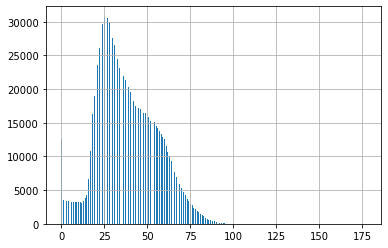

In [1459]:
cln_people['AGE'].hist(bins='auto');

In [1460]:
cln_people['AGE'].fillna(cln_people['AGE'].median(), inplace= True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2398575915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['AGE'].fillna(cln_people['AGE'].median(), inplace= True)


In [1461]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1526028 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


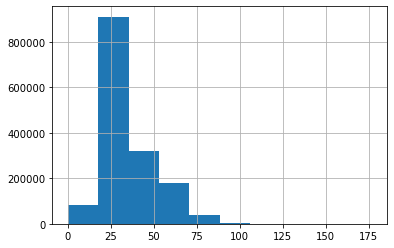

In [1462]:
cln_people['AGE'].hist();

In [1463]:
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY BELT USED                              741510
USAGE UNKNOWN                                 699868
NONE PRESENT                                   47896
SAFETY BELT NOT USED                            8625
CHILD RESTRAINT USED                            7821
HELMET NOT USED                                 6525
CHILD RESTRAINT - FORWARD FACING                3409
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)      2457
CHILD RESTRAINT - TYPE UNKNOWN                  1718
CHILD RESTRAINT - REAR FACING                   1610
HELMET USED                                     1358
DOT COMPLIANT MOTORCYCLE HELMET                  974
BOOSTER SEAT                                     913
CHILD RESTRAINT NOT USED                         668
SHOULD/LAP BELT USED IMPROPERLY                  190
NOT DOT COMPLIANT MOTORCYCLE HELMET              186
WHEELCHAIR                                       163
CHILD RESTRAINT USED IMPROPERLY                  107
STRETCHER                                     

In [1464]:
sf_equip = ['SAFETY BELT USED', 'CHILD RESTRAINT USED', 'CHILD RESTRAINT - FORWARD FACING', 
            'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 'CHILD RESTRAINT - TYPE UNKNOWN',
           'CHILD RESTRAINT - REAR FACING', 'HELMET USED', 'DOT COMPLIANT MOTORCYCLE HELMET',
           'BOOSTER SEAT', 'WHEELCHAIR', 'STRETCHER']

f1 = (lambda x: 'SAFETY EQUIPMENT USED' if x in sf_equip 
      else ('USAGE UNKNOWN' if x =='USAGE UNKNOWN' else 'SAFETY EQUIPMENT MISSING/MISUSED'))

In [1465]:
cln_people['SAFETY_EQUIPMENT'] = cln_people['SAFETY_EQUIPMENT'].map(f1)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1319362629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['SAFETY_EQUIPMENT'] = cln_people['SAFETY_EQUIPMENT'].map(f1)


In [1466]:
cln_people['SAFETY_EQUIPMENT'].value_counts()

SAFETY EQUIPMENT USED               761963
USAGE UNKNOWN                       699868
SAFETY EQUIPMENT MISSING/MISUSED     68554
Name: SAFETY_EQUIPMENT, dtype: int64

In [1467]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1529714 non-null  object 
 6   DRIVER_ACTION          1218047 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1468]:
cln_people['INJURY_CLASSIFICATION'].fillna('NO INDICATION OF INJURY',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/507145097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['INJURY_CLASSIFICATION'].fillna('NO INDICATION OF INJURY',inplace=True)


In [1469]:
cln_people['INJURY_CLASSIFICATION'].value_counts()

NO INDICATION OF INJURY     1400611
NONINCAPACITATING INJURY      73185
REPORTED, NOT EVIDENT         41738
INCAPACITATING INJURY         14003
FATAL                           848
Name: INJURY_CLASSIFICATION, dtype: int64

In [1470]:
cln_people['DRIVER_ACTION'].value_counts()

NONE                                 438974
UNKNOWN                              301595
FAILED TO YIELD                      110980
OTHER                                107701
FOLLOWED TOO CLOSELY                  74349
IMPROPER BACKING                      37076
IMPROPER TURN                         31917
IMPROPER LANE CHANGE                  31451
IMPROPER PASSING                      27025
DISREGARDED CONTROL DEVICES           21109
TOO FAST FOR CONDITIONS               18947
WRONG WAY/SIDE                         4794
IMPROPER PARKING                       4556
OVERCORRECTED                          1955
EVADING POLICE VEHICLE                 1940
CELL PHONE USE OTHER THAN TEXTING      1867
EMERGENCY VEHICLE ON CALL              1110
TEXTING                                 504
STOPPED SCHOOL BUS                      145
LICENSE RESTRICTIONS                     52
Name: DRIVER_ACTION, dtype: int64

In [1471]:
cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_ACTION'].fillna('UNKNOWN',inplace=True)



/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2568104299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_ACTION'].fillna('UNKNOWN',inplace=True)


In [1472]:
cln_people['DRIVER_ACTION'].fillna('NOT A DRIVER',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2070697399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['DRIVER_ACTION'].fillna('NOT A DRIVER',inplace=True)


In [1473]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1217601 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1474]:
cln_people['DRIVER_VISION'].value_counts()

NOT OBSCURED              632631
UNKNOWN                   554663
OTHER                      12394
MOVING VEHICLES             7183
PARKED VEHICLES             4415
WINDSHIELD (WATER/ICE)      3476
BLINDED - SUNLIGHT          1451
TREES, PLANTS                535
BUILDINGS                    442
BLINDED - HEADLIGHTS         120
HILLCREST                     93
BLOWING MATERIALS             88
EMBANKMENT                    77
SIGNBOARD                     33
Name: DRIVER_VISION, dtype: int64

In [1475]:
cln_people['DRIVER_VISION'].replace(['MOVING VEHICLES',
                                    'PARKED VEHICLES',
                                    'WINDSHIELD (WATER/ICE)',
                                    'BLINDED - SUNLIGHT',
                                    'TREES, PLANTS',
                                    'BUILDINGS',
                                    'BLINDED - HEADLIGHTS',
                                    'HILLCREST',
                                    'BLOWING MATERIALS',
                                    'EMBANKMENT',
                                    'SIGNBOARD'], 'OBSCURED', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/402049334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['DRIVER_VISION'].replace(['MOVING VEHICLES',


In [1476]:
cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_VISION'].fillna('UNKNOWN',inplace=True)



/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/320385495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE']=='DRIVER']['DRIVER_VISION'].fillna('UNKNOWN',inplace=True)


In [1477]:
cln_people['DRIVER_VISION'].fillna('NOT A DRIVER',inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2223903099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['DRIVER_VISION'].fillna('NOT A DRIVER',inplace=True)


In [1478]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1530385 non-null  object 
 8   PHYSICAL_CONDITION     1218903 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1479]:
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL                          801930
UNKNOWN                         394225
IMPAIRED - ALCOHOL                5489
REMOVED BY EMS                    4515
OTHER                             3579
FATIGUED/ASLEEP                   3260
EMOTIONAL                         2710
ILLNESS/FAINTED                   1138
HAD BEEN DRINKING                  929
IMPAIRED - DRUGS                   644
IMPAIRED - ALCOHOL AND DRUGS       331
MEDICATED                          153
Name: PHYSICAL_CONDITION, dtype: int64

In [1480]:
cln_people['PHYSICAL_CONDITION'].replace(['IMPAIRED - ALCOHOL',
                                    'REMOVED BY EMS',
                                    'FATIGUED/ASLEEP',
                                    'EMOTIONAL',
                                    'ILLNESS/FAINTED',
                                    'HAD BEEN DRINKING',
                                    'IMPAIRED - DRUGS',
                                    'IMPAIRED - ALCOHOL AND DRUGS',
                                    'MEDICATED'], 'IMPAIRED', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/3776286194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['PHYSICAL_CONDITION'].replace(['IMPAIRED - ALCOHOL',


In [1481]:
cln_people['PHYSICAL_CONDITION'].fillna('UNKNOWN', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/3467022535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['PHYSICAL_CONDITION'].fillna('UNKNOWN', inplace=True)


In [1482]:
cln_people['PHYSICAL_CONDITION'].value_counts()

NORMAL      801930
UNKNOWN     705707
IMPAIRED     19169
OTHER         3579
Name: PHYSICAL_CONDITION, dtype: int64

In [1483]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530385 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530385 non-null  object 
 1   CRASH_RECORD_ID        1530385 non-null  object 
 2   VEHICLE_ID             1500311 non-null  float64
 3   AGE                    1530385 non-null  float64
 4   SAFETY_EQUIPMENT       1530385 non-null  object 
 5   INJURY_CLASSIFICATION  1530385 non-null  object 
 6   DRIVER_ACTION          1530385 non-null  object 
 7   DRIVER_VISION          1530385 non-null  object 
 8   PHYSICAL_CONDITION     1530385 non-null  object 
 9   PEDPEDAL_ACTION        28502 non-null    object 
 10  PEDPEDAL_VISIBILITY    28446 non-null    object 
 11  PEDPEDAL_LOCATION      28499 non-null    object 
 12  BAC_RESULT VALUE       1824 non-null     float64
dtypes: float64(3), object(10)
memory usage: 151.8+ MB


In [1484]:
cln_people['PEDPEDAL_ACTION'].value_counts()

CROSSING - WITH SIGNAL                               5861
WITH TRAFFIC                                         4420
UNKNOWN/NA                                           3698
OTHER ACTION                                         3456
CROSSING - NO CONTROLS (NOT AT INTERSECTION)         1682
NO ACTION                                            1508
CROSSING - NO CONTROLS (AT INTERSECTION)             1422
CROSSING - AGAINST SIGNAL                            1361
NOT AT INTERSECTION                                  1005
AGAINST TRAFFIC                                       874
CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)     826
STANDING IN ROADWAY                                   674
TURNING LEFT                                          390
PARKED VEHICLE                                        326
ENTER FROM DRIVE/ALLEY                                275
WORKING IN ROADWAY                                    196
TURNING RIGHT                                         177
INTOXICATED PE

In [1485]:
cln_people['PEDPEDAL_ACTION'].fillna('NOT A PEDPEDAL', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/372509294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['PEDPEDAL_ACTION'].fillna('NOT A PEDPEDAL', inplace=True)


In [1486]:
cln_people['PEDPEDAL_VISIBILITY'].value_counts()

NO CONTRASTING CLOTHING    22345
CONTRASTING CLOTHING        3753
OTHER LIGHT SOURCE USED     1635
REFLECTIVE MATERIAL          713
Name: PEDPEDAL_VISIBILITY, dtype: int64

In [1487]:
cln_people['PEDPEDAL_VISIBILITY'].fillna('NOT A PEDPEDAL', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2704626677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['PEDPEDAL_VISIBILITY'].fillna('NOT A PEDPEDAL', inplace=True)


In [1488]:
cln_people['PEDPEDAL_LOCATION'].value_counts()

IN ROADWAY         12781
IN CROSSWALK        9487
UNKNOWN/NA          2375
NOT IN ROADWAY      1273
BIKEWAY             1227
BIKE LANE            794
DRIVEWAY ACCESS      416
SHOULDER             146
Name: PEDPEDAL_LOCATION, dtype: int64

In [1489]:
cln_people['PEDPEDAL_LOCATION'].fillna('NOT A PEDPEDAL', inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1061375013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['PEDPEDAL_LOCATION'].fillna('NOT A PEDPEDAL', inplace=True)


In [1490]:
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.33     15
0.04     15
0.05     11
0.32      9
0.35      9
0.02      8
0.31      8
0.06      8
0.38      6
0.36      4
0.34      4
0.39      3
0.44      3
0.01      3
1.00      2
0.79      2
0.88      2
0.45      2
0.60      2
0.95      1
0.40      1
0.47      1
0.99      1
0.41      1
0.80      1
0.58      1
0.37      1
0.85      1
0.67      1
0.98      1
Name: BAC_RESULT VALUE, dtype: int64

BAC 0.30% to 0.40%: In this percentage range, you'll likely have alcohol poisoning, a potentially life-threatening condition, and experience loss of consciousness. BAC Over 0.40%: This is a potentially fatal blood alcohol level.

In [1491]:
cln_people.drop((cln_people[cln_people['BAC_RESULT VALUE']>0.40].index),inplace=True) 

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1503961553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people.drop((cln_people[cln_people['BAC_RESULT VALUE']>0.40].index),inplace=True)


In [1492]:
cln_people['BAC_RESULT VALUE']=cln_people['BAC_RESULT VALUE'].astype('float')

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/1974577471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['BAC_RESULT VALUE']=cln_people['BAC_RESULT VALUE'].astype('float')


In [1493]:
cln_people['BAC_RESULT VALUE'].value_counts()

0.00    176
0.17    127
0.18    126
0.21    110
0.14    102
0.20     95
0.16     90
0.19     87
0.15     80
0.22     76
0.23     73
0.12     68
0.13     68
0.11     64
0.24     59
0.25     41
0.26     40
0.27     34
0.10     34
0.09     32
0.28     28
0.08     19
0.29     18
0.03     17
0.07     17
0.30     16
0.04     15
0.33     15
0.05     11
0.35      9
0.32      9
0.31      8
0.06      8
0.02      8
0.38      6
0.34      4
0.36      4
0.39      3
0.01      3
0.37      1
0.40      1
Name: BAC_RESULT VALUE, dtype: int64

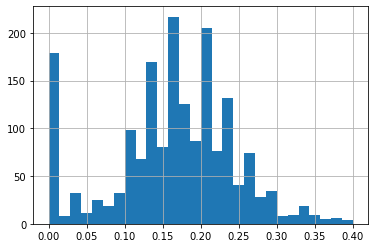

In [1494]:
cln_people['BAC_RESULT VALUE'].hist(bins='auto');

In [1495]:
cln_people['BAC_RESULT VALUE'].fillna(0,inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_23501/2416775652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people['BAC_RESULT VALUE'].fillna(0,inplace=True)


In [1496]:
cln_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530363 entries, 0 to 1530384
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_TYPE            1530363 non-null  object 
 1   CRASH_RECORD_ID        1530363 non-null  object 
 2   VEHICLE_ID             1500289 non-null  float64
 3   AGE                    1530363 non-null  float64
 4   SAFETY_EQUIPMENT       1530363 non-null  object 
 5   INJURY_CLASSIFICATION  1530363 non-null  object 
 6   DRIVER_ACTION          1530363 non-null  object 
 7   DRIVER_VISION          1530363 non-null  object 
 8   PHYSICAL_CONDITION     1530363 non-null  object 
 9   PEDPEDAL_ACTION        1530363 non-null  object 
 10  PEDPEDAL_VISIBILITY    1530363 non-null  object 
 11  PEDPEDAL_LOCATION      1530363 non-null  object 
 12  BAC_RESULT VALUE       1530363 non-null  float64
dtypes: float64(3), object(10)
memory usage: 163.5+ MB


In [1497]:
veh_crsh_ppl = pd.merge(veh_crsh, cln_people, how='inner', on='CRASH_RECORD_ID' )

In [1498]:
veh_crsh_ppl.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT VALUE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,56.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0


In [1499]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [1500]:
veh_crsh_ppl['VEHICLE_TYPE'].value_counts()

PASSENGER                                 572702
SPORT UTILITY VEHICLE (SUV)               110811
VAN/MINI-VAN                               40232
UNKNOWN/NA                                 39279
PICKUP                                     25734
TRUCK - SINGLE UNIT                        10077
BUS OVER 15 PASS.                           8269
OTHER                                       6906
TRACTOR W/ SEMI-TRAILER                     5071
MOTORCYCLE (OVER 150CC)                     3824
BUS UP TO 15 PASS.                          1068
SINGLE UNIT TRUCK WITH TRAILER               932
TRACTOR W/O SEMI-TRAILER                     826
OTHER VEHICLE WITH TRAILER                   628
MOPED OR MOTORIZED BICYCLE                   501
MOTOR DRIVEN CYCLE                           200
ALL-TERRAIN VEHICLE (ATV)                    174
AUTOCYCLE                                    112
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          51
FARM EQUIPMENT                                28
RECREATIONAL OFF-HIG

In [1501]:
veh_crsh_ppl.drop(['VEHICLE_CONFIG'],axis=1,inplace=True)

In [1502]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [1503]:
veh_crsh_ppl.drop(columns=['VEHICLE_ID_x','VEHICLE_ID_y'], axis=1, inplace=True)

In [1504]:
veh_crsh_ppl.head()

,CRASH_RECORD_ID,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,...,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT VALUE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,56.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,27.0,SAFETY EQUIPMENT USED,NO INDICATION OF INJURY,NOT A DRIVER,NOT A DRIVER,UNKNOWN,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019,30,FUNCTIONING PROPERLY,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,RECKLESS/IMPROPER DRIVING,...,22.0,SAFETY EQUIPMENT USED,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,NOT A PEDPEDAL,NOT A PEDPEDAL,NOT A PEDPEDAL,0.0


In [1505]:
veh_crsh_ppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827451 entries, 0 to 827450
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CRASH_RECORD_ID          827451 non-null  object 
 1   CRASH_YEAR               827451 non-null  int64  
 2   POSTED_SPEED_LIMIT       827451 non-null  int64  
 3   DEVICE_CONDITION         827451 non-null  object 
 4   WEATHER_CONDITION        827451 non-null  object 
 5   LIGHTING_CONDITION       827451 non-null  object 
 6   CRASH_TYPE               827451 non-null  object 
 7   INTERSECTION_RELATED_I   827451 non-null  object 
 8   ROAD_DEFECT              827451 non-null  object 
 9   PRIM_CONTRIBUTORY_CAUSE  827451 non-null  object 
 10  NUM_UNITS                827451 non-null  int64  
 11  WORK_ZONE_I              827451 non-null  object 
 12  WORKERS_PRESENT_I        827451 non-null  object 
 13  INJURIES_TOTAL           827451 non-null  float64
 14  INJU

In [1506]:
veh_crsh_ppl.drop(columns=['TRAILER1_LENGTH','TRAILER2_LENGTH', 'TRAILER2_I'], axis=1, inplace=True)

In [1707]:
veh_crsh_ppl.drop(columns=['TRAILER2_I'], axis=1, inplace=True)

In [1708]:
veh_crsh_ppl.drop(columns=['PEDPEDAL_ACTION'], axis=1, inplace=True)

### Data Processing

In [1710]:
veh_crsh_ppl.set_index('CRASH_RECORD_ID',inplace=True)

KeyError: "None of ['CRASH_RECORD_ID'] are in the columns"

In [1711]:
from sklearn.model_selection import StratifiedShuffleSplit

In [1712]:
X = veh_crsh_ppl.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = veh_crsh_ppl['PRIM_CONTRIBUTORY_CAUSE']

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(splitter.split(X, y))

X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1713]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661960 entries, 626ae4aadfc657dac559c2c6e5334566e402116d0ca9ea92d708d7c5c70f8cc4b23a00ea58e46a5b9436d81bf290b853d6fefd0a676f9dcda1278546f45c7b97 to 8d34703bca6e8d34703600b0c203873f853b8213dea22d5eef9985e105df402f5895490802b5552d637b5ea5ba04e03355457bd77857961024abd3a617374dd8
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRASH_YEAR              661960 non-null  int64  
 1   POSTED_SPEED_LIMIT      661960 non-null  int64  
 2   DEVICE_CONDITION        661960 non-null  object 
 3   WEATHER_CONDITION       661960 non-null  object 
 4   LIGHTING_CONDITION      661960 non-null  object 
 5   CRASH_TYPE              661960 non-null  object 
 6   INTERSECTION_RELATED_I  661960 non-null  object 
 7   ROAD_DEFECT             661960 non-null  object 
 8   NUM_UNITS               661960 non-null  int64  
 9   WORK_ZONE_I             661960 non-null  objec

In [1714]:
# Select only integer columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Get the integer index positions of the columns
cat_indices = [X_train.columns.get_loc(col) for col in cat_cols]

In [1715]:
from imblearn.under_sampling import RandomUnderSampler

In [1716]:
print('Before Random Undersampling:', Counter(y_train))

Before Random Undersampling: Counter({'FAILING TO YIELD RIGHT-OF-WAY': 113470, 'RECKLESS/IMPROPER DRIVING': 103236, 'UNABLE TO DETERMINE': 101175, 'NOT APPLICABLE': 84205, 'TRAFFIC RULES VIOLATED': 76742, 'FAILING TO REDUCE SPEED TO AVOID CRASH': 57990, 'FOLLOWING TOO CLOSELY': 57862, 'COMPROMISED DRIVING': 41438, "NATURE'S IMPACT": 12042, 'OBSTRUCTIONS': 8945, 'OVERSPEEDING': 4855})


In [1717]:
print('Before Random Undersampling:', Counter(X_train))

Before Random Undersampling: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'CRASH_TYPE': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'VEHICLE_DEFECT': 1, 'VEHICLE_TYPE': 1, 'VEHICLE_USE': 1, 'MANEUVER': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'CARGO_BODY_TYPE': 1, 'TRAILER1_I': 1, 'PERSON_TYPE': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'DRIVER_ACTION': 1, 'DRIVER_VISION': 1, 'PHYSICAL_CONDITION': 1, 'PEDPEDAL_VISIBILITY': 1, 'PEDPEDAL_LOCATION': 1, 'BAC_RESULT VALUE': 1})


In [1718]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)


In [1719]:
# Count the number of samples in each class after undersampling
print('After Random Undersampling:', Counter(y_train_resampled2))

After Random Undersampling: Counter({'COMPROMISED DRIVING': 4855, 'FAILING TO REDUCE SPEED TO AVOID CRASH': 4855, 'FAILING TO YIELD RIGHT-OF-WAY': 4855, 'FOLLOWING TOO CLOSELY': 4855, "NATURE'S IMPACT": 4855, 'NOT APPLICABLE': 4855, 'OBSTRUCTIONS': 4855, 'OVERSPEEDING': 4855, 'RECKLESS/IMPROPER DRIVING': 4855, 'TRAFFIC RULES VIOLATED': 4855, 'UNABLE TO DETERMINE': 4855})


In [1720]:
print('Before Random Undersampling:', Counter(X_train_resampled2))

Before Random Undersampling: Counter({'CRASH_YEAR': 1, 'POSTED_SPEED_LIMIT': 1, 'DEVICE_CONDITION': 1, 'WEATHER_CONDITION': 1, 'LIGHTING_CONDITION': 1, 'CRASH_TYPE': 1, 'INTERSECTION_RELATED_I': 1, 'ROAD_DEFECT': 1, 'NUM_UNITS': 1, 'WORK_ZONE_I': 1, 'WORKERS_PRESENT_I': 1, 'INJURIES_TOTAL': 1, 'INJURIES_FATAL': 1, 'CRASH_HOUR': 1, 'CRASH_DAY_OF_WEEK': 1, 'CRASH_MONTH': 1, 'LATITUDE': 1, 'LONGITUDE': 1, 'VEHICLE_DEFECT': 1, 'VEHICLE_TYPE': 1, 'VEHICLE_USE': 1, 'MANEUVER': 1, 'WIDE_LOAD_I': 1, 'OCCUPANT_CNT': 1, 'EXCEED_SPEED_LIMIT_I': 1, 'CARGO_BODY_TYPE': 1, 'TRAILER1_I': 1, 'PERSON_TYPE': 1, 'AGE': 1, 'SAFETY_EQUIPMENT': 1, 'INJURY_CLASSIFICATION': 1, 'DRIVER_ACTION': 1, 'DRIVER_VISION': 1, 'PHYSICAL_CONDITION': 1, 'PEDPEDAL_VISIBILITY': 1, 'PEDPEDAL_LOCATION': 1, 'BAC_RESULT VALUE': 1})


In [1721]:
X_train['DEVICE_CONDITION'].value_counts()

FUNCTIONING PROPERLY        321918
NO CONTROLS                 296499
NOT FUNCTIONING PROPERLY     43543
Name: DEVICE_CONDITION, dtype: int64

In [1722]:
X_train_resampled2['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 24968
FUNCTIONING PROPERLY        24909
NOT FUNCTIONING PROPERLY     3528
Name: DEVICE_CONDITION, dtype: int64

In [1723]:
X_train_resampled2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53405 entries, 0 to 53404
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CRASH_YEAR              53405 non-null  int64  
 1   POSTED_SPEED_LIMIT      53405 non-null  int64  
 2   DEVICE_CONDITION        53405 non-null  object 
 3   WEATHER_CONDITION       53405 non-null  object 
 4   LIGHTING_CONDITION      53405 non-null  object 
 5   CRASH_TYPE              53405 non-null  object 
 6   INTERSECTION_RELATED_I  53405 non-null  object 
 7   ROAD_DEFECT             53405 non-null  object 
 8   NUM_UNITS               53405 non-null  int64  
 9   WORK_ZONE_I             53405 non-null  object 
 10  WORKERS_PRESENT_I       53405 non-null  object 
 11  INJURIES_TOTAL          53405 non-null  float64
 12  INJURIES_FATAL          53405 non-null  float64
 13  CRASH_HOUR              53405 non-null  int64  
 14  CRASH_DAY_OF_WEEK       53405 non-null

In [1724]:
y_train_resampled2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 53405 entries, 0 to 53404
Series name: PRIM_CONTRIBUTORY_CAUSE
Non-Null Count  Dtype 
--------------  ----- 
53405 non-null  object
dtypes: object(1)
memory usage: 417.4+ KB


In [1725]:
# smote_nc = SMOTENC(categorical_features= cat_indices, random_state=0, sampling_strategy=0.01)

In [1726]:
# X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [1727]:
# X_resampled['INJURY_CLASSIFICATION'].value_counts()

In [1728]:
X_train.select_dtypes(include=['object']).columns

Index(['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'ROAD_DEFECT', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'MANEUVER', 'WIDE_LOAD_I', 'EXCEED_SPEED_LIMIT_I', 'CARGO_BODY_TYPE',
       'TRAILER1_I', 'PERSON_TYPE', 'SAFETY_EQUIPMENT',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION'],
      dtype='object')

In [1729]:
np.array(cat_cols)

array(['DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'ROAD_DEFECT',
       'WORK_ZONE_I', 'WORKERS_PRESENT_I', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'MANEUVER', 'WIDE_LOAD_I',
       'EXCEED_SPEED_LIMIT_I', 'CARGO_BODY_TYPE', 'TRAILER1_I',
       'PERSON_TYPE', 'SAFETY_EQUIPMENT', 'INJURY_CLASSIFICATION',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION'], dtype=object)

In [1730]:
X_train_resampled_ohe = pd.get_dummies(X_train_resampled2[np.array(cat_cols)])
X_test_ohe = pd.get_dummies(X_test[np.array(cat_cols)])

X_train_resampled_ohe

,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING PROPERLY,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_NOT CLEAR,LIGHTING_CONDITION_DAY TIME,LIGHTING_CONDITION_NIGHT TIME,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,INTERSECTION_RELATED_I_N,INTERSECTION_RELATED_I_Y,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
53401,1,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
53402,1,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
53403,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [1731]:
X_train_knn = pd.concat([X_train_resampled2, X_train_resampled_ohe], axis=1)
X_test_knn = pd.concat([X_test, X_test_ohe], axis=1)

X_train_knn

,CRASH_YEAR,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,INTERSECTION_RELATED_I,ROAD_DEFECT,NUM_UNITS,WORK_ZONE_I,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,2022,20,NO CONTROLS,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
1,2023,30,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
2,2022,30,NO CONTROLS,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,3,N,...,0,0,0,0,0,0,1,0,0,0
3,2021,30,FUNCTIONING PROPERLY,NOT CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
4,2018,30,NO CONTROLS,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,4,N,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400,2020,30,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,3,N,...,0,0,0,0,0,0,1,0,0,0
53401,2020,30,FUNCTIONING PROPERLY,NOT CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,Y,NO DEFECTS,2,N,...,0,0,0,0,0,0,1,0,0,0
53402,2018,30,FUNCTIONING PROPERLY,CLEAR,NIGHT TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,2,N,...,0,0,0,0,0,0,0,0,0,1
53403,2018,35,NO CONTROLS,CLEAR,DAY TIME,INJURY AND / OR TOW DUE TO CRASH,N,NO DEFECTS,6,N,...,0,0,0,0,0,0,1,0,0,0


In [1732]:
X_train_knn_dr = X_train_knn.drop(np.array(cat_cols),axis=1)
X_test_knn_dr = X_test_knn.drop(np.array(cat_cols),axis=1)

In [1733]:
X_train_knn_dr.head()

,CRASH_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
0,2022,20,2,0.0,0.0,1,7,4,41.677975,-87.618833,...,0,0,0,0,0,0,1,0,0,0
1,2023,30,2,0.0,0.0,14,6,2,41.848770,-87.666122,...,0,0,0,0,0,0,1,0,0,0
2,2022,30,3,1.0,0.0,8,2,1,41.822838,-87.689874,...,0,0,0,0,0,0,1,0,0,0
3,2021,30,2,1.0,0.0,11,6,10,41.813970,-87.664961,...,0,0,0,0,0,0,1,0,0,0
4,2018,30,4,0.0,0.0,17,4,12,41.962319,-87.760971,...,0,0,0,0,0,0,1,0,0,0


In [1734]:
X_test_knn_dr.head()

,CRASH_YEAR,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,...,PEDPEDAL_VISIBILITY_REFLECTIVE MATERIAL,PEDPEDAL_LOCATION_BIKE LANE,PEDPEDAL_LOCATION_BIKEWAY,PEDPEDAL_LOCATION_DRIVEWAY ACCESS,PEDPEDAL_LOCATION_IN CROSSWALK,PEDPEDAL_LOCATION_IN ROADWAY,PEDPEDAL_LOCATION_NOT A PEDPEDAL,PEDPEDAL_LOCATION_NOT IN ROADWAY,PEDPEDAL_LOCATION_SHOULDER,PEDPEDAL_LOCATION_UNKNOWN/NA
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,
5407b3bcd5f897ca66e2af559afe52db5556e7af2e7d9c8aa100119fba1274bfff782e1ff6ab8a454f397314e9df7ef391fd1fde4d088e4bfa3bbe8608fc6efe,2019,30,6,2.0,0.0,17,1,6,41.778405,-87.735109,...,0,0,0,0,0,0,1,0,0,0
cdf0083775d3b06035d951614aee22be5bf1c393ecc793fbdec43913860cf15c1ab784aa727f0880815ea5b456d33ee82363788a8daa8a34ffde339a4c34bbba,2018,30,2,1.0,0.0,11,2,12,41.808512,-87.665117,...,0,0,0,0,1,0,0,0,0,0
2e76a002809b2cdbfd666a4bcca7e4df087410f92300151b5afd3e94b83ad33b59a361ee3c6a4352f64b571914b464a65cd055511f7274c4ebf8722d65960844,2022,30,2,2.0,0.0,0,1,6,41.735808,-87.654401,...,0,0,0,0,0,0,1,0,0,0
85d67d6e301fe00f29f7e1f74e46affa5b9e98f794e3e30a1e8b4ee4351aec25eae1c760dd9fe2eed0a561065b5639dea40b57d5087a1e57619c93fc9045982c,2020,30,1,0.0,0.0,21,7,6,41.882302,-87.679252,...,0,0,0,0,0,0,1,0,0,0
58ca8955d063939cb6b13da051892586f9088f3ca5baec65ebeaad2673a03ae2753fbe65a37cf6ea21f867dcd6842f4c0450c74528b4f0cbea4978697edabcd0,2020,30,3,0.0,0.0,17,3,12,41.745928,-87.585995,...,0,0,0,0,0,0,1,0,0,0


In [1735]:
for col in X_test_knn_dr.columns:
    if col not in  X_train_knn_dr.columns:
        print(col)

## Modeling and Evaluation

### Baseline Model

In [1540]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1736]:
lr = LogisticRegression()

In [1737]:
lr.fit(X_train_knn_dr,y_train_resampled2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1738]:
y_pred = lr.predict(X_test_knn_dr)

In [1739]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.1643593911451378

In [1740]:
from sklearn.metrics import confusion_matrix

In [1741]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1572,  469,  606,  810,  928, 1010, 1080, 2103,  270, 1197,  315],
       [1032,  998, 1118, 1403, 1610, 1285, 1134, 2885,  340, 2117,  576],
       [ 530,  480, 5374, 1415, 3396, 1836, 3308, 4727,  668, 5892,  742],
       [ 647,  551, 1021, 2207, 1841, 1476, 1475, 2673,  392, 1687,  495],
       [  69,  130,  163,  203, 1257,  224,  270,  419,   13,  210,   53],
       [1013,  676, 1396, 1525, 2398, 3227, 2148, 3801,  515, 2420, 1932],
       [ 116,   42,  259,  146,  321,  152,  556,  335,   41,  217,   51],
       [  77,   58,   44,   70,  240,   90,   83,  367,   15,  127,   43],
       [1504,  937, 2069, 2073, 2985, 2786, 3159, 4921, 1124, 3171, 1080],
       [ 334,  512, 2225,  755, 1802,  910, 1014, 3123,  170, 7824,  516],
       [1128,  834, 1591, 1553, 2818, 4161, 2181, 4606,  466, 3262, 2694]])

In [1742]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [1743]:
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.2515863260804347
Recall: 0.1643593911451378


In [1744]:
report = classification_report(y_test, y_pred)
print(report)

                                        precision    recall  f1-score   support

                   COMPROMISED DRIVING       0.20      0.15      0.17     10360
FAILING TO REDUCE SPEED TO AVOID CRASH       0.18      0.07      0.10     14498
         FAILING TO YIELD RIGHT-OF-WAY       0.34      0.19      0.24     28368
                 FOLLOWING TOO CLOSELY       0.18      0.15      0.17     14465
                       NATURE'S IMPACT       0.06      0.42      0.11      3011
                        NOT APPLICABLE       0.19      0.15      0.17     21051
                          OBSTRUCTIONS       0.03      0.25      0.06      2236
                          OVERSPEEDING       0.01      0.30      0.02      1214
             RECKLESS/IMPROPER DRIVING       0.28      0.04      0.08     25809
                TRAFFIC RULES VIOLATED       0.28      0.41      0.33     19185
                   UNABLE TO DETERMINE       0.32      0.11      0.16     25294

                              accuracy

### KNN Model

In [1568]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [1750]:
# Define the KNN classifier and the parameter grid for grid search
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_knn_dr, y_train_resampled2)
best_k = grid_search.best_params_['n_neighbors']
print(best_k)

3


In [1751]:
# Train the KNN classifier with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_k)#best_k)
knn.fit(X_train_knn_dr, y_train_resampled2)

KNeighborsClassifier(n_neighbors=3)

In [1752]:
# Evaluate the model with cross-validation
cv_scores = cross_val_score(knn, X_train_knn_dr, y_train_resampled2, cv=3)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.24311875 0.24109651 0.23729004]
Mean CV score: 0.24050176553270952


In [1753]:
# Make predictions on the test set
y_pred = knn.predict(X_test_knn_dr)

In [1754]:
# Calculate the confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)
print("Classification report:\n", class_report)


Confusion matrix:
 [[4073 1459  999  929  508  581  521  447  274  303  266]
 [2654 4155 1795 1510  822  831  638  586  448  622  437]
 [4305 4722 7382 3005 1555 1690 1652  957  904 1519  677]
 [2416 2461 2110 3594  756  742  658  558  386  406  378]
 [ 355  344  318  226 1291  110   84  121   51   65   46]
 [3611 3409 3048 2414 1267 3040  967  690  667  723 1215]
 [ 301  244  369  214  128  137  651   57   56   50   29]
 [  90   73   60   67   48   21   22  793   12    7   21]
 [4744 4469 3903 3067 1599 1923 1385 1104 1838  924  853]
 [2968 3143 3433 1813 1044 1179  921  810  544 2840  490]
 [4265 4161 3623 2728 1640 2771 1215  917  827  949 2198]]
Classification report:
                                         precision    recall  f1-score   support

                   COMPROMISED DRIVING       0.14      0.39      0.20     10360
FAILING TO REDUCE SPEED TO AVOID CRASH       0.15      0.29      0.19     14498
         FAILING TO YIELD RIGHT-OF-WAY       0.27      0.26      0.27     283

In [1755]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.1924878090047193
Precision: 0.25555110206491577
Recall: 0.1924878090047193


### Random Forests Model

### XG Boost Model

### Models Comaprison

## Final Model Evlauation

## Conclusion

### Improvements

### Next Steps

### Recommendations

## Disregard

It would be helpful to take a look at the data for a general understanding of the undeerlying pattern.

In [55]:
df = crashes_df.copy()

In [57]:
df[['date', 'time', 'AM/PM']] = df.CRASH_DATE.str.split(expand=True)

In [61]:
df.date = pd.to_datetime(df['date'])

0        2019-03-25
1        2018-09-05
2        2022-07-15
3        2022-08-29
4        2022-07-15
            ...    
692779   2022-11-24
692780   2022-11-24
692781   2022-11-24
692782   2022-11-24
692783   2022-11-24
Name: date, Length: 692784, dtype: datetime64[ns]

In [63]:
df.time = pd.to_datetime(df.time)

<AxesSubplot:>

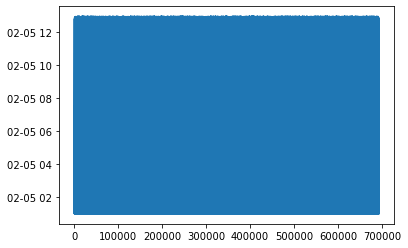

In [64]:
df.time.plot()

In [49]:
df = crashes_df.copy()

df['CRASH_DATE'] = df['CRASH_DATE'].map(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))

In [52]:
crashes_df['CRASH_DATE'].map(lambda x: dt.datetime.strftime(x, '%m/%d/%Y %H:%M:%S %p'))

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

In [ ]:
crashes_dfdf['CRASH_DATE']

In [78]:
#check unique values
crashes_df['NOT_RIGHT_OF_WAY_I'].value_counts()

Y    29573
N     2912
Name: NOT_RIGHT_OF_WAY_I, dtype: int64

In [547]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXCEEDING AUTHORIZED SPEED LIMIT',
                                                'EXCEEDING SAFE SPEED FOR CONDITIONS'
                                         ], 'OVERSPEEDING', inplace=True)

In [548]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
                                         ], "NATURE'S IMPACT", inplace=True)

In [549]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT',
                                                'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                                                'OBSTRUCTED CROSSWALKS', 
                                                'ANIMAL', 
                                                'ROAD CONSTRUCTION/MAINTENANCE', 
                                                'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
                                                'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
                                                'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
                                         ], 'OBSTRUCTIONS', inplace=True)

In [552]:
cln_crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER',
                                                'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 
                                                'DISTRACTION - FROM INSIDE VEHICLE', 
                                                'CELL PHONE USE OTHER THAN TEXTING', 
                                                'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                                                'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',
                                                'DISTRACTION - FROM OUTSIDE VEHICLE',
                                                'EQUIPMENT - VEHICLE CONDITION',
                                                'TEXTING'
                                         ], 'COMPROMISED DRIVING', inplace=True)

In [379]:
cln_people[cln_people['PERSON_TYPE'] == 'PASSENGER']['SEAT_NO'].value_counts()

3.0     150042
6.0      52277
4.0      41331
5.0      14578
1.0      13563
2.0      12780
12.0      7996
7.0       7163
10.0      6805
11.0      2678
8.0        352
Name: SEAT_NO, dtype: int64

In [380]:
cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['SEAT_NO'].fillna(1.0, inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_2584/3252034905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cln_people[cln_people['PERSON_TYPE'] == 'DRIVER']['SEAT_NO'].fillna(1.0, inplace=True)


Change it back to categorical

Come back to it

Possibly create a new feature explaining which units were invlved in the crash and whether there was a passenger in there. 

In [1299]:
numerical_features = [col[i] for i in (0,1,8,11,12,13,14,15,16,17,23,29,38)]
numerical_features

['CRASH_YEAR',
 'POSTED_SPEED_LIMIT',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'OCCUPANT_CNT',
 'AGE',
 'BAC_RESULT VALUE']

In [1300]:
categorical_features = [col[i] for i in range(len(col)) if col[i] not in numerical_features]
categorical_features

['DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'ROAD_DEFECT',
 'WORK_ZONE_I',
 'WORKERS_PRESENT_I',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'MANEUVER',
 'WIDE_LOAD_I',
 'EXCEED_SPEED_LIMIT_I',
 'CARGO_BODY_TYPE',
 'TRAILER2_I',
 'TRAILER1_I',
 'PERSON_TYPE',
 'SAFETY_EQUIPMENT',
 'INJURY_CLASSIFICATION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'PEDPEDAL_ACTION',
 'PEDPEDAL_VISIBILITY',
 'PEDPEDAL_LOCATION']

In [1069]:
X_train_ohe.head()

AttributeError: head not found

In [1302]:
ct = ColumnTransformer([("encoder", OneHotEncoder(), categorical_features)], remainder="passthrough")
X_train_ohe = ct.fit_transform(X_train)

In [1303]:
from sklearn.neighbors import NearestNeighbors

In [1304]:
nbrs = NearestNeighbors(n_neighbors=2, metric="manhattan").fit(X_train_ohe)
distances, indices = nbrs.kneighbors(X_train_ohe)

KeyboardInterrupt: 

In [ ]:
smote = SMOTE(sampling_strategy="minority", k_neighbors=5, metric="precomputed")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ohe, y)

In [ ]:
X_resampled = pd.DataFrame(X_resampled, columns=ct.get_feature_names())
X_resampled[categorical_features] = X_resampled[categorical_features].idxmax(axis=1).str.split("_", expand=True)[1]

In [219]:
sm = SMOTENC(random_state=42, categorical_features=[3])#,4,5,6,7,8,9,10,18,19,20,21,22,24,
                                                    #25,26,27,28,29,30,32,33,34,35,36,37,38,39,40])
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

ValueError: Input contains NaN